In [1]:
import h5py as hdf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob 
import seaborn as sns
import os
import netCDF4 as cdf
from mpl_toolkits.basemap import Basemap
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [4]:
from mpl_toolkits import axes_grid1
def add_colorbar(im, aspect=20, pad_fraction=0.5, **kwargs):
    """Add a vertical color bar to an image plot."""
    divider = axes_grid1.make_axes_locatable(im.axes)
    width = axes_grid1.axes_size.AxesY(im.axes, aspect=1./aspect)
    pad = axes_grid1.axes_size.Fraction(pad_fraction, width)
    current_ax = plt.gca()
    cax = divider.append_axes("right", size=width, pad=pad)
    plt.sca(current_ax)
    return im.axes.figure.colorbar(im, cax=cax, **kwargs)
def plot_rectangle(bmap, lonmin,lonmax,latmin,latmax):
    xs = [lonmin,lonmax,lonmax,lonmin,lonmin]
    ys = [latmin,latmin,latmax,latmax,latmin]
    bmap.plot(xs, ys,latlon = True,color='white')

In [20]:
path        = '/usr/people/botiabo/botiabo/data_download/Joiner/Level2/'
prefix      = 'ret_f_nr5_nsvd12_v26_waves734_nolog.MOB.'
#prefix      = 'ret_f_nr5_nsvd12_v26_waves734_nolog.'
sufix       = '_v27_all.nc'
start_date  = '2013-03-01'
end_date    = '2013-07-14'
daterange   = pd.date_range(start_date, end_date, freq='D')

cont = 0
for single_date in daterange:
    
    year  = str(single_date.year)
    month = str(single_date.month).zfill(2)
    day   = str(single_date.day).zfill(2)
    fname = path + prefix + year + month + day + sufix
    
    try:
        
        datag2b = cdf.Dataset(fname)
    except:
        #print month,day
        continue
    
    Fs       = np.array(datag2b.variables['SIF_740'])
    cloud    = np.array(datag2b.variables['cloud_fraction'])
    sza      = np.array(datag2b.variables['SZA'])
    vza      = np.array(datag2b.variables['VZA'])
    lat      = np.array(datag2b.variables['latitude'])
    lon      = np.array(datag2b.variables['longitude'])
    q_flag   = np.array(datag2b.variables['Quality_flag'])
    Fs_unco  = np.array(datag2b.variables['SIF_uncorrected'])
    
    columns  = ['lat','lon','Fs','Fs_uncorrected','SZA','VZA','Cloud Fraction','Q_flag']
    d        = np.array(np.ones((Fs.shape[0],len(columns))))
    nameDf   = pd.DataFrame(data=d,columns=columns)
    varss    = [lat,lon,Fs,Fs_unco,sza,vza,cloud,q_flag]
    
    for k,j in enumerate(columns):
        nameDf[j] = varss[k]
        #nameDf.to_pickle('dataframes/Joiner/joiner_A_%s'%(year+month+day))
        nameDf.to_pickle('dataframes/Joiner/joiner_B_%s'%(year+month+day))
#print cont


count    174602.000000
mean          0.060639
std           0.741615
min          -8.663565
25%          -0.397945
50%           0.039533
75%           0.491455
max          24.491465
Name: Fs, dtype: float64 count    174602.000000
mean         -0.004380
std           0.742101
min          -8.548899
25%          -0.457868
50%          -0.011151
75%           0.434065
max          24.308447
Name: Fs_uncorrected, dtype: float64


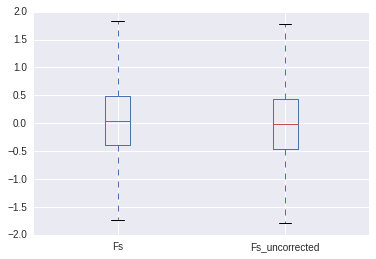

In [47]:
# Filtering Cloud fraction lower than 0.4

testA  =  pd.read_pickle('dataframes/Joiner/joiner_A_20130301')
testA[['Fs','Fs_uncorrected']].plot(kind='box')
plt.ylim(-2,2)
print testA.Fs.describe(),testA.Fs_uncorrected.describe()

(-1, 2)

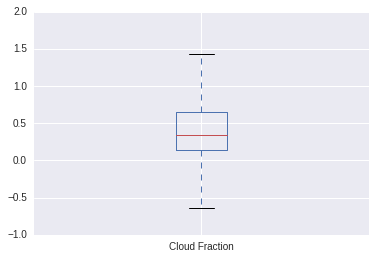

In [46]:
(testA['Cloud Fraction']).plot(kind='box')
plt.ylim(-1,2)

2013 3 1


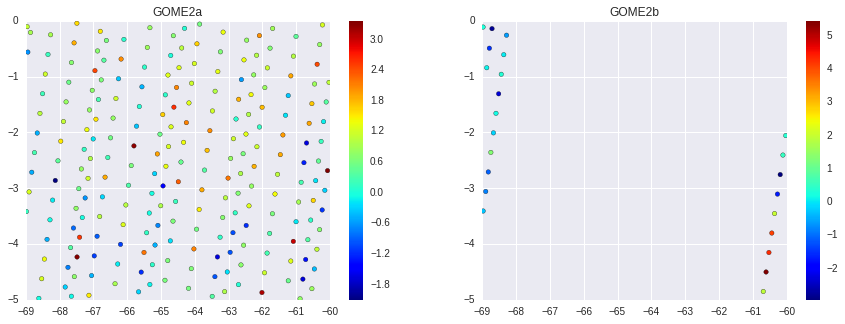

2013 3 2


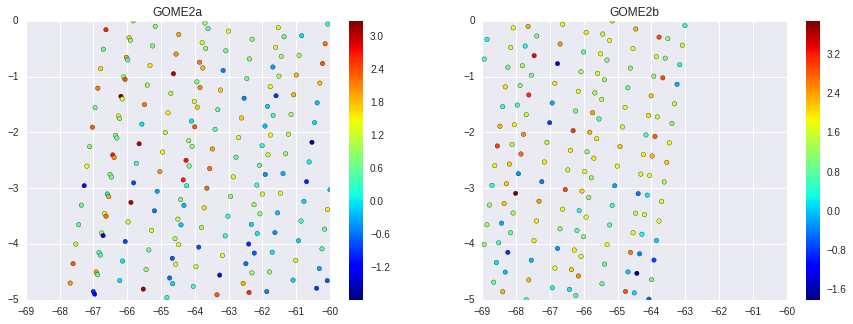

2013 3 3


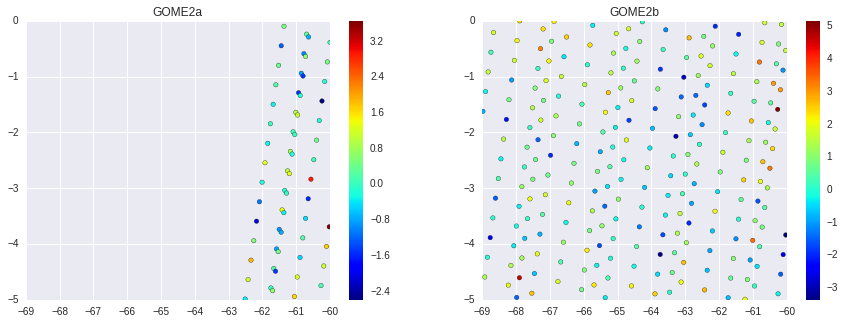

2013 3 4


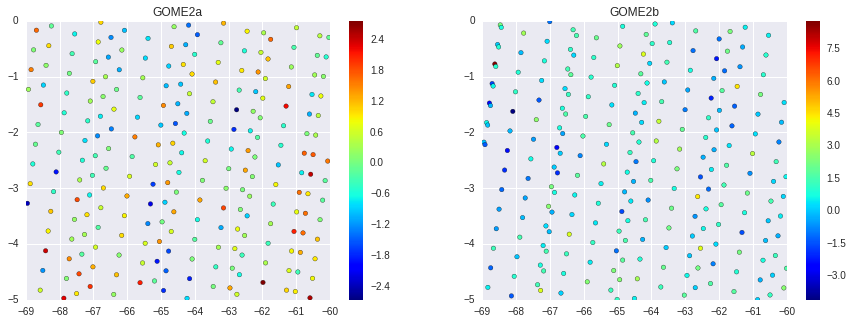

2013 3 5


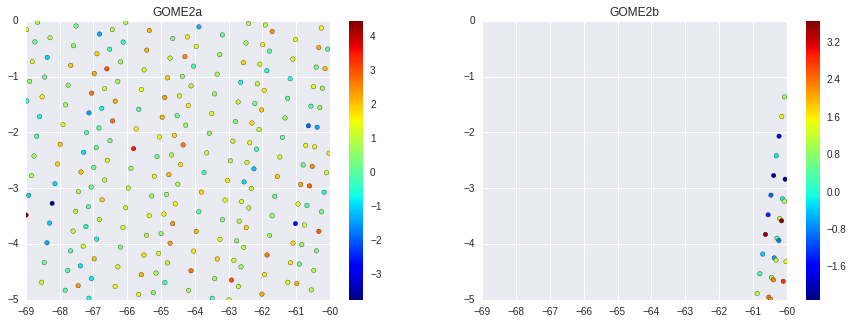

2013 3 6


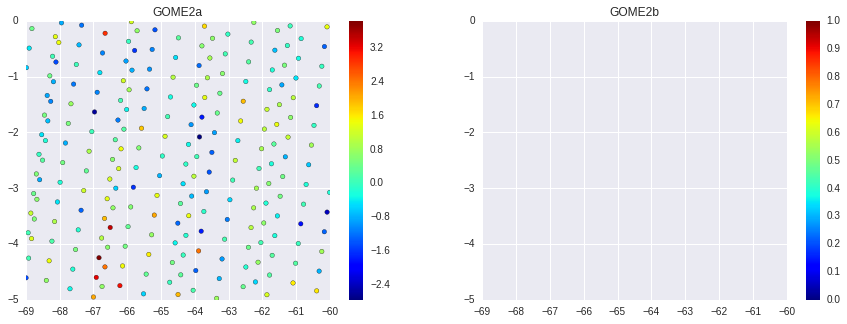

2013 3 7


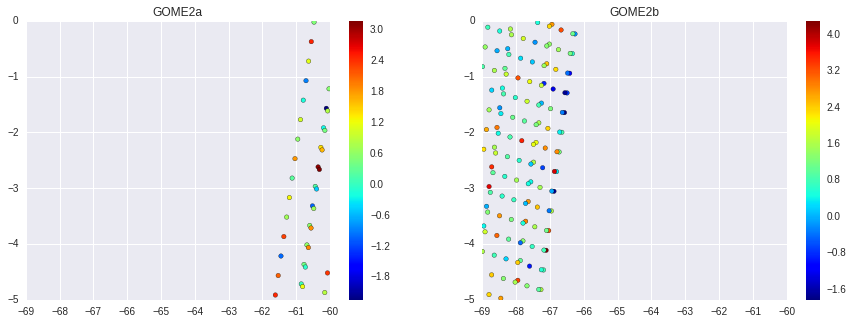

2013 3 8


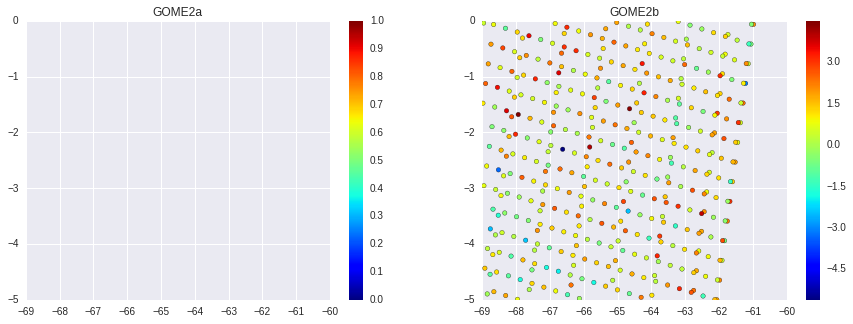

2013 3 9


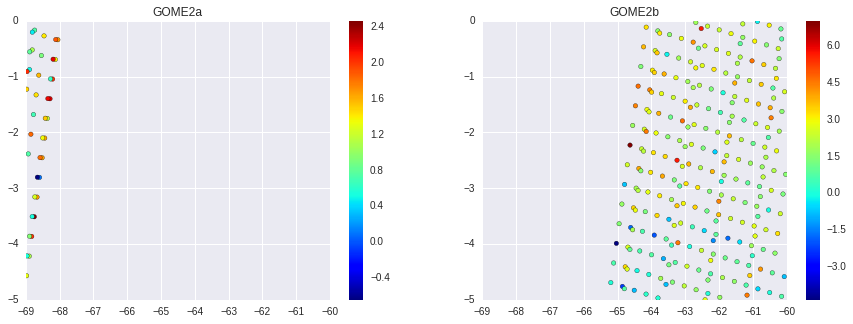

2013 3 10


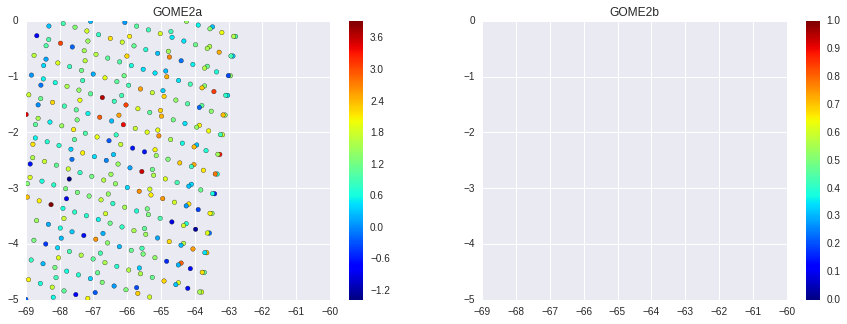

2013 3 11


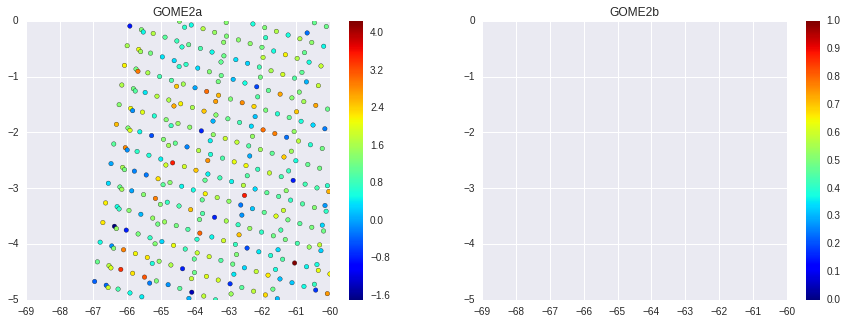

2013 3 12


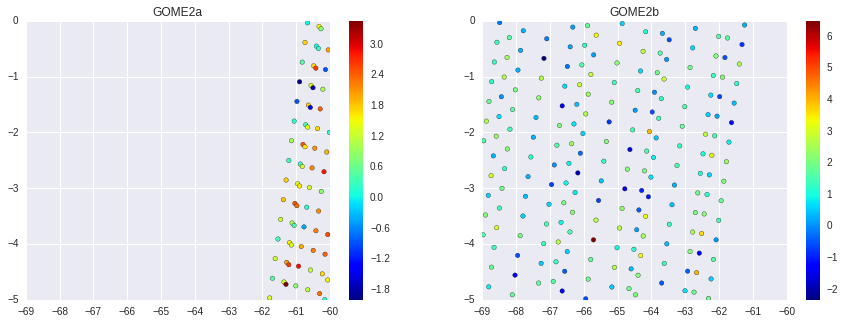

2013 3 13


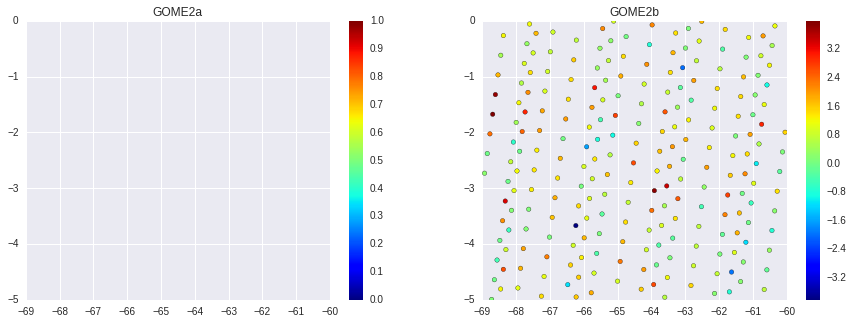

2013 3 14


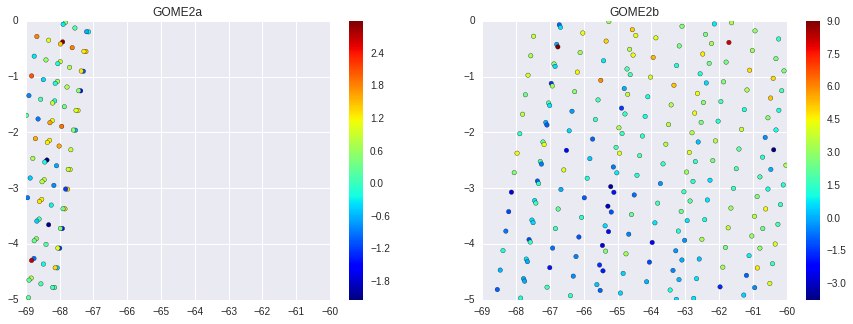

2013 3 28


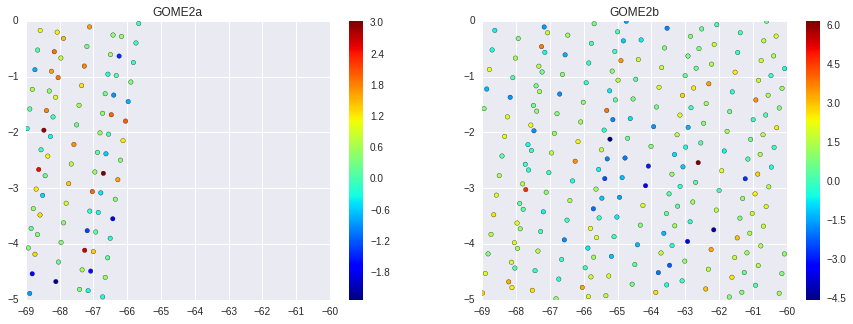

2013 3 29


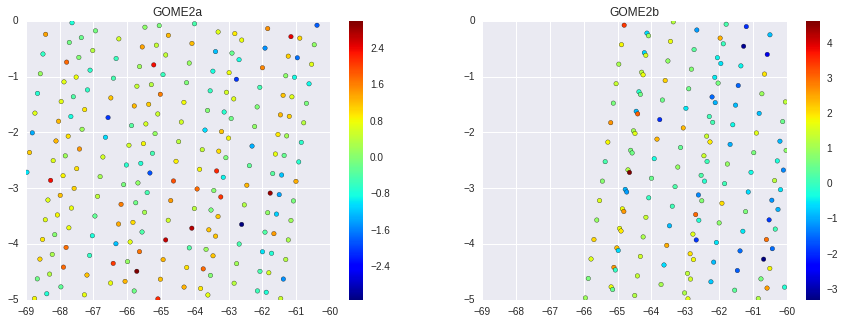

2013 3 30


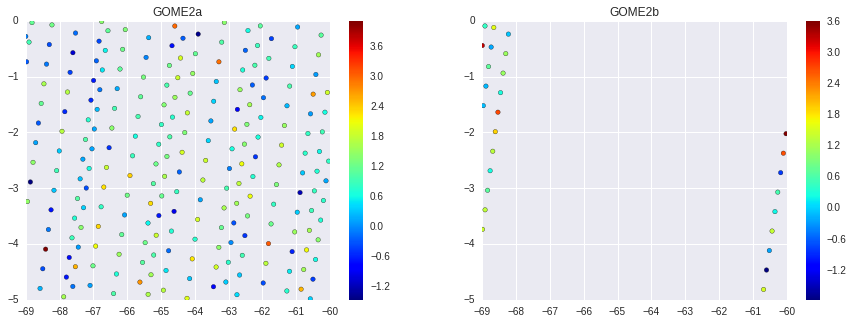

2013 3 31


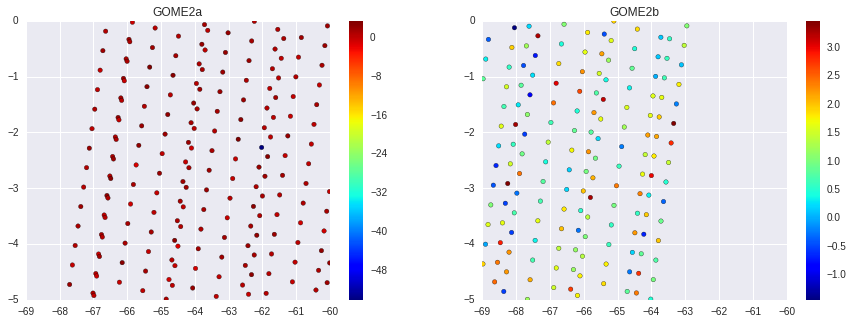

2013 4 1


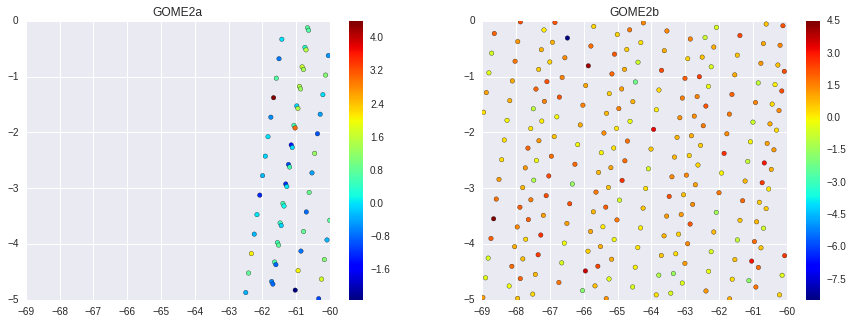

2013 4 2


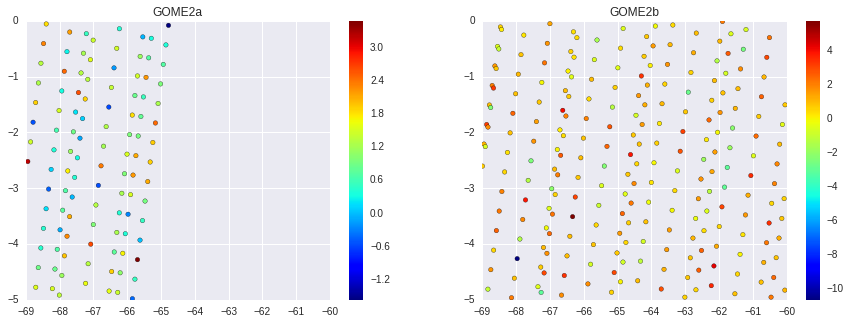

2013 4 3


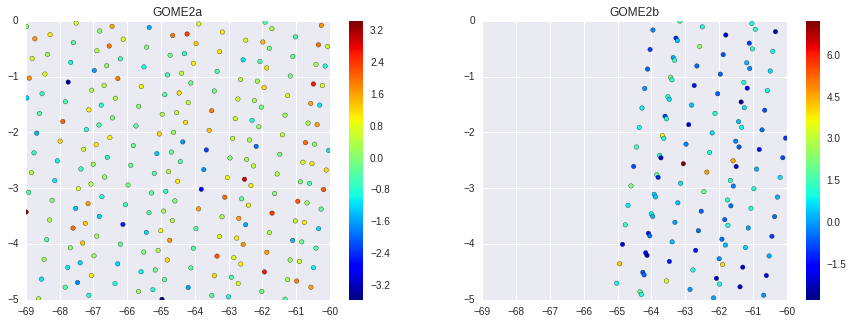

2013 4 4


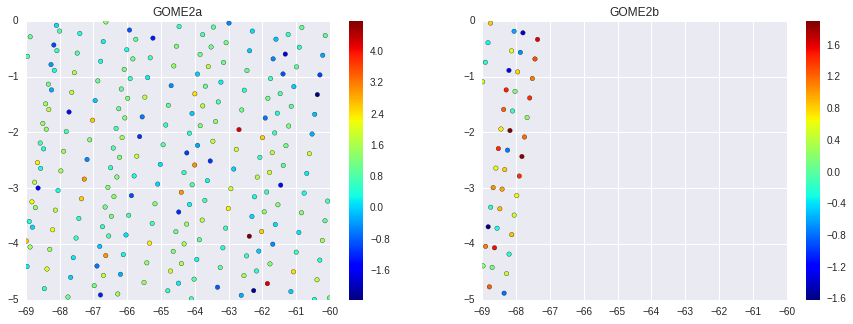

2013 4 5


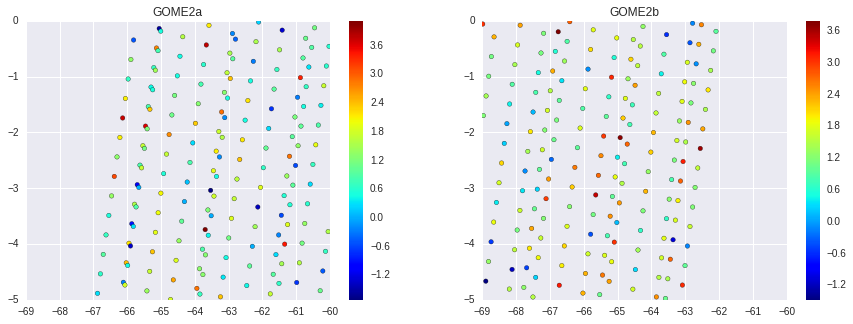

2013 4 6


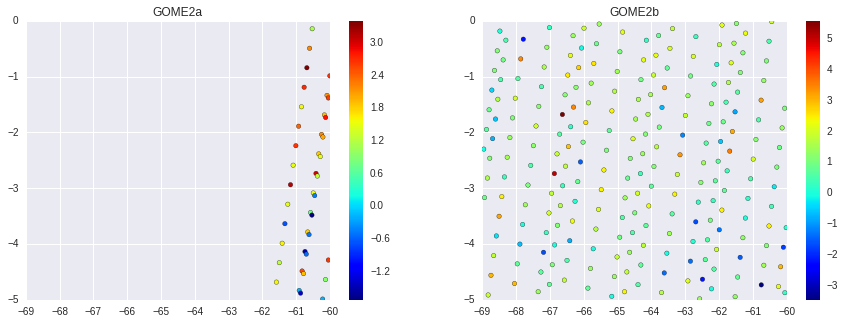

2013 4 7


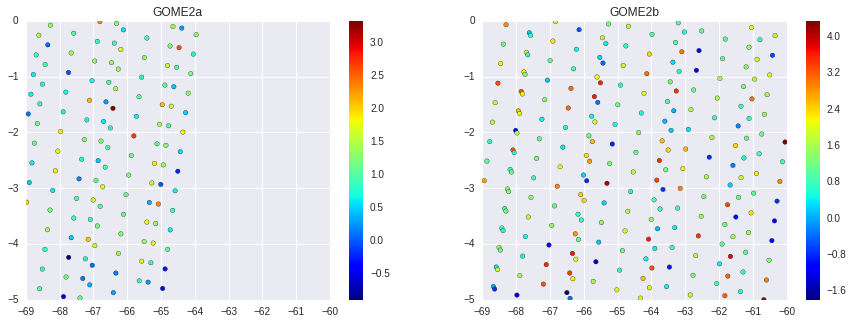

2013 4 8


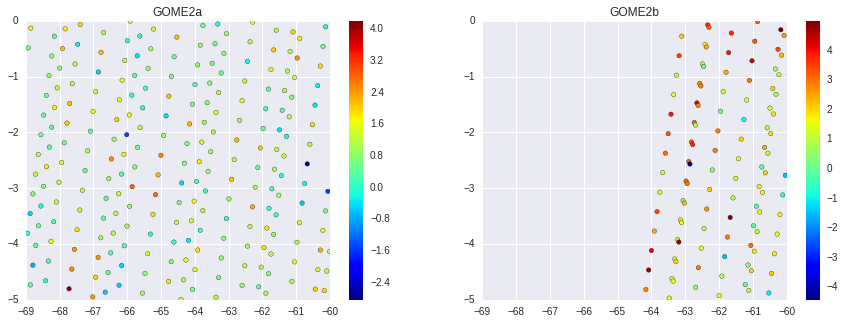

2013 4 9


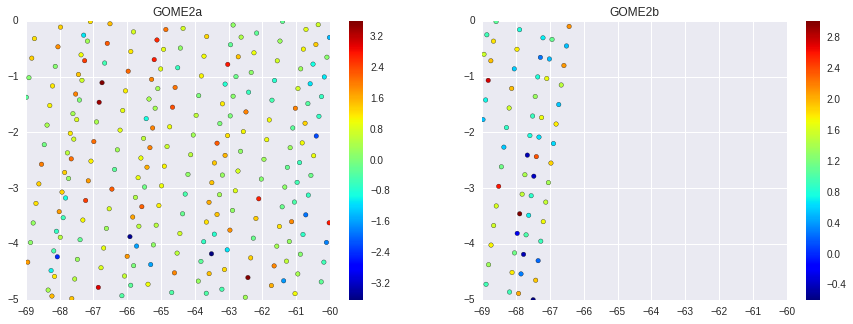

2013 4 12


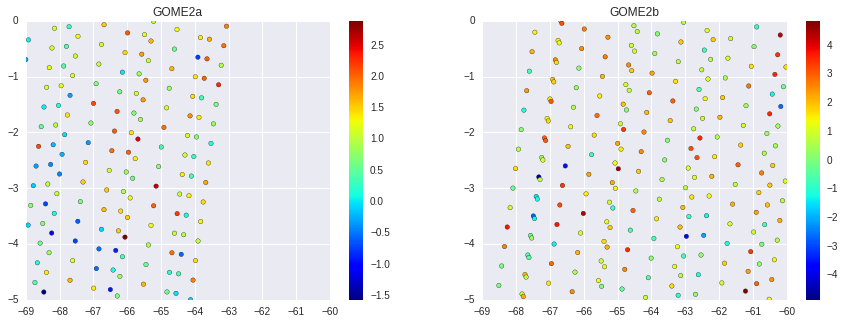

2013 4 13


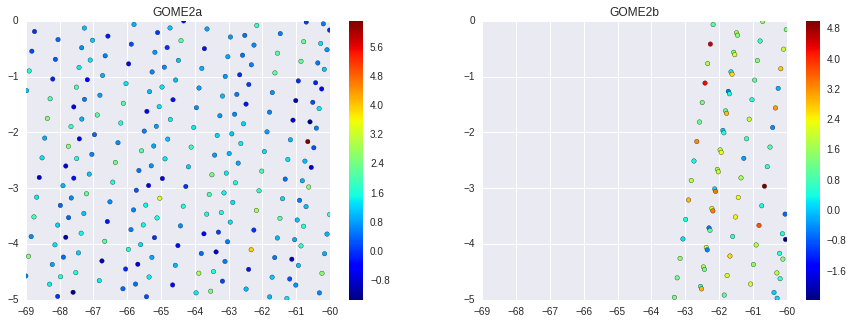

2013 4 14


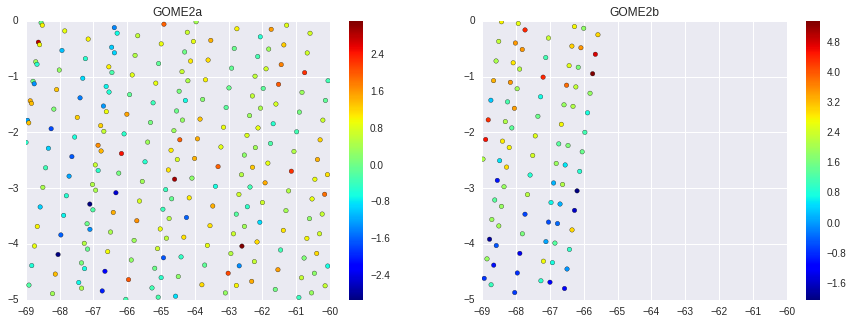

2013 4 15


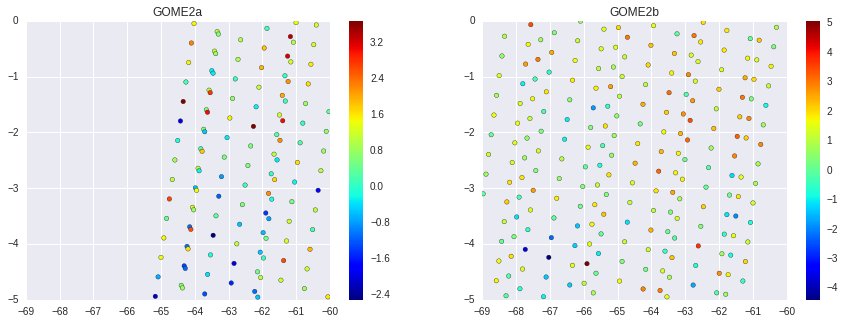

2013 4 16


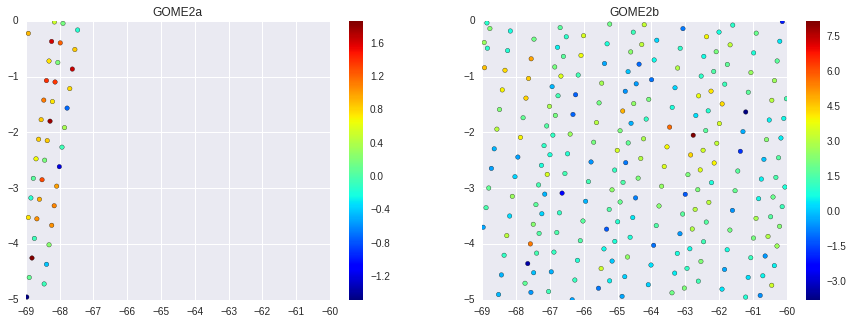

2013 4 17


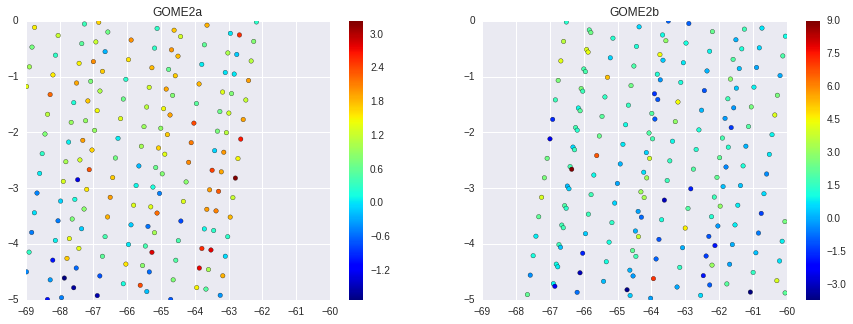

2013 4 18


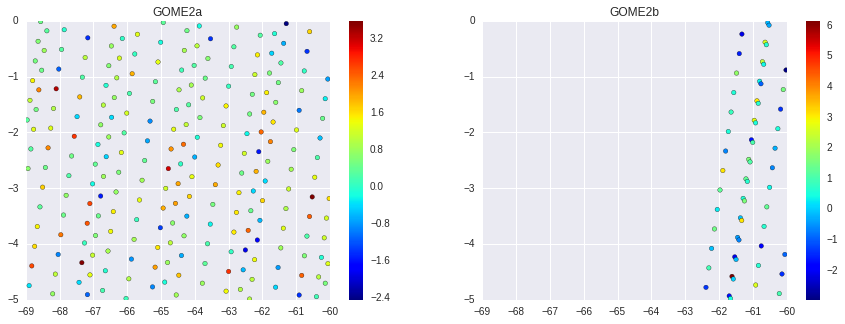

2013 4 19


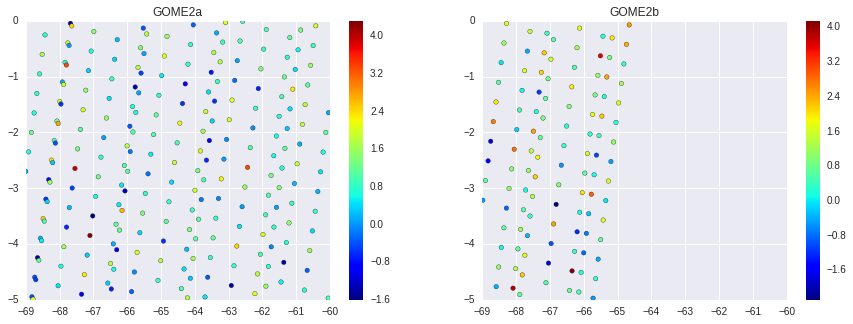

2013 4 20


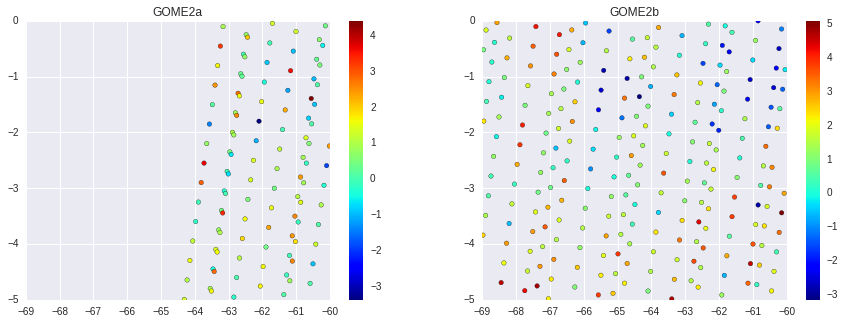

2013 4 21


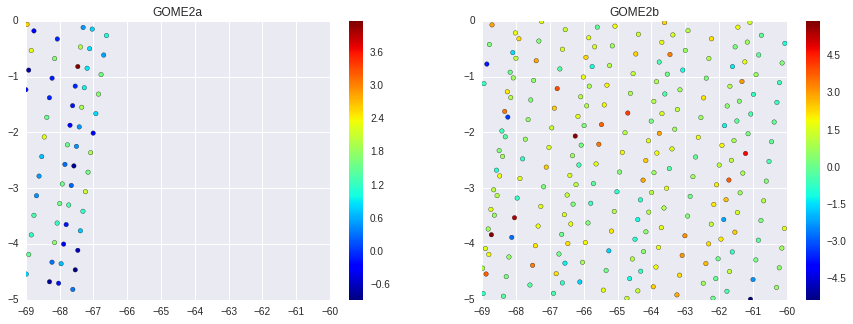

2013 4 22


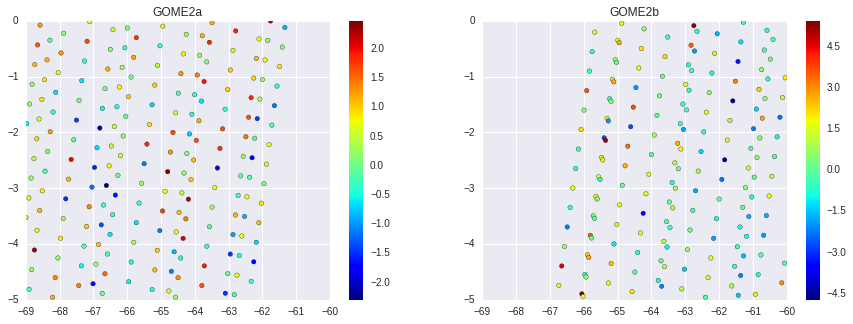

2013 4 23


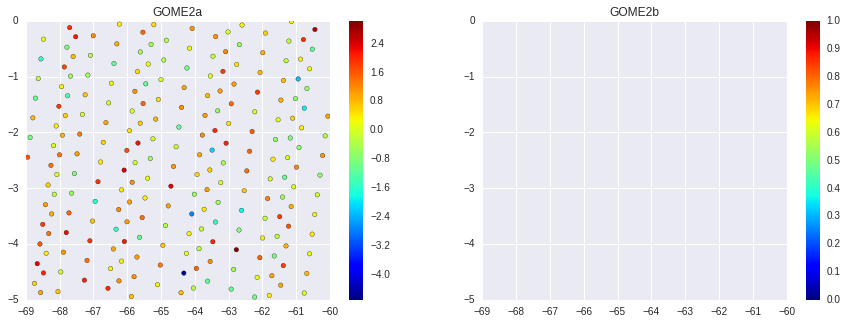

2013 4 24


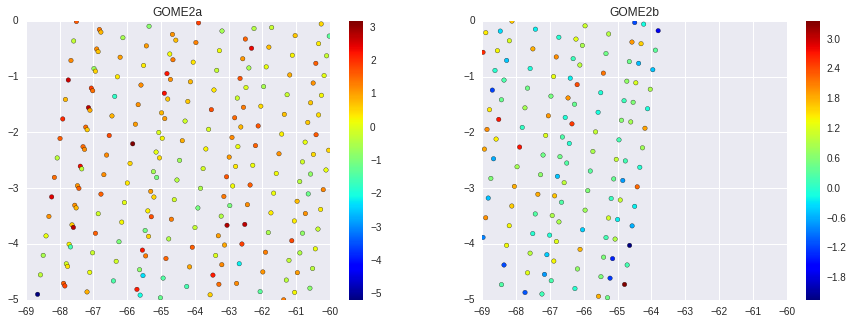

2013 4 25


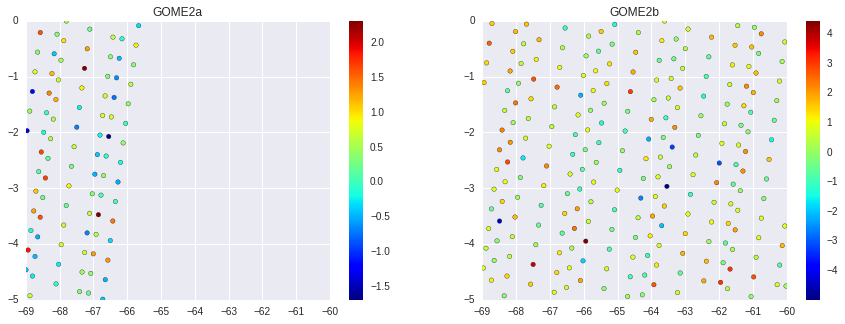

2013 4 26


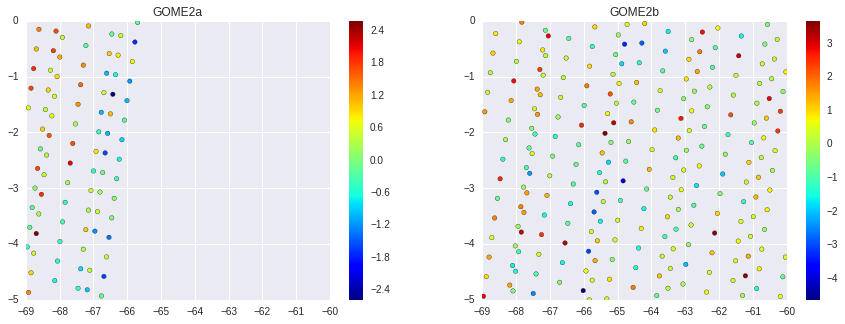

2013 4 27


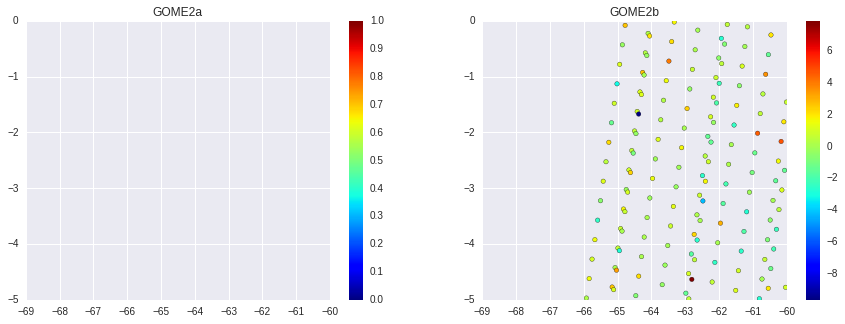

2013 4 28


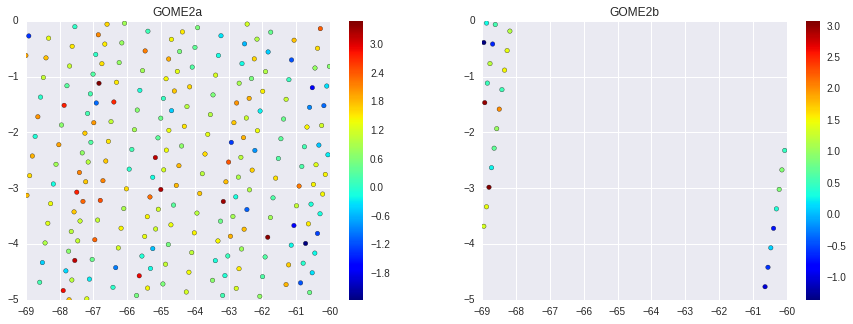

2013 4 29


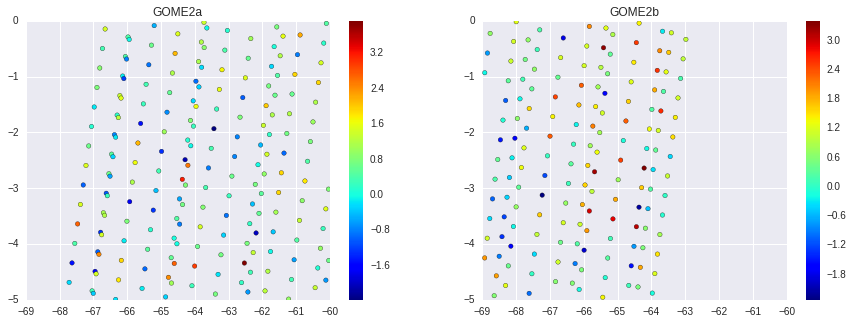

2013 4 30


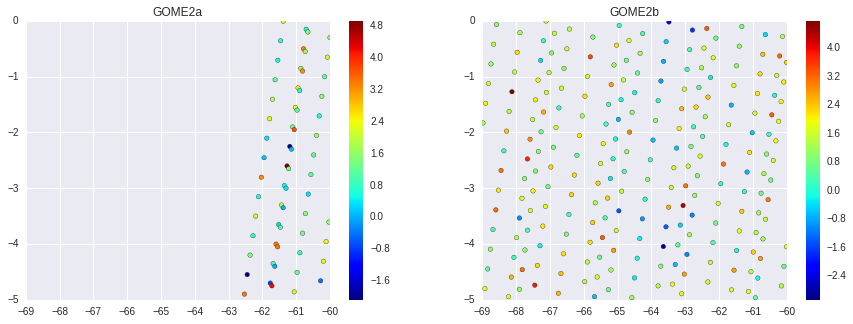

2013 5 1


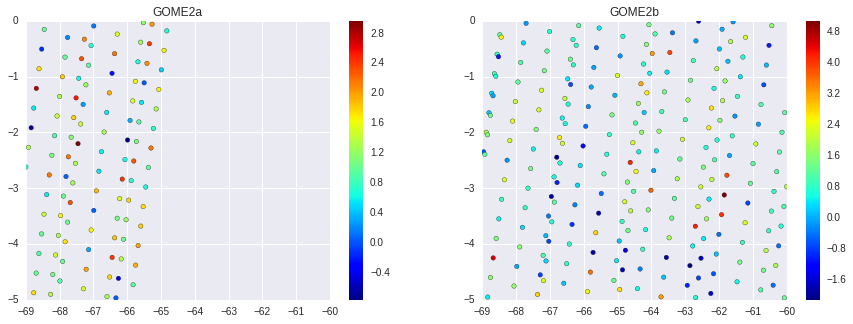

2013 5 2


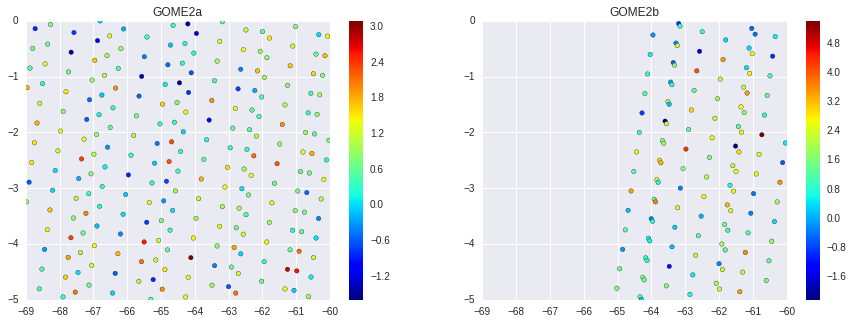

2013 5 3


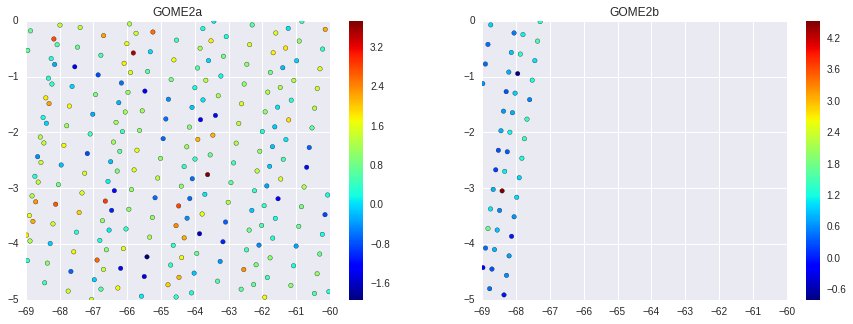

2013 5 4


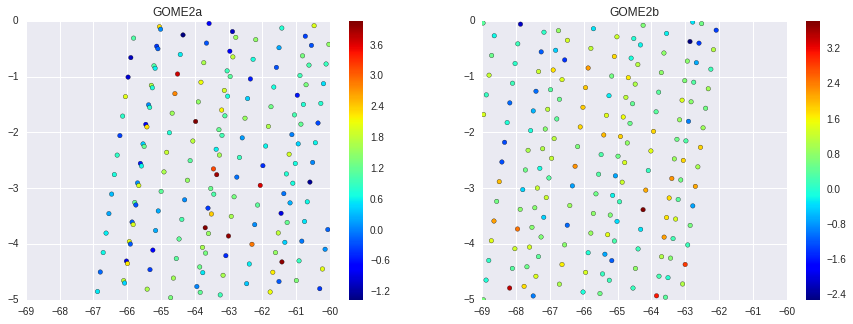

2013 5 5


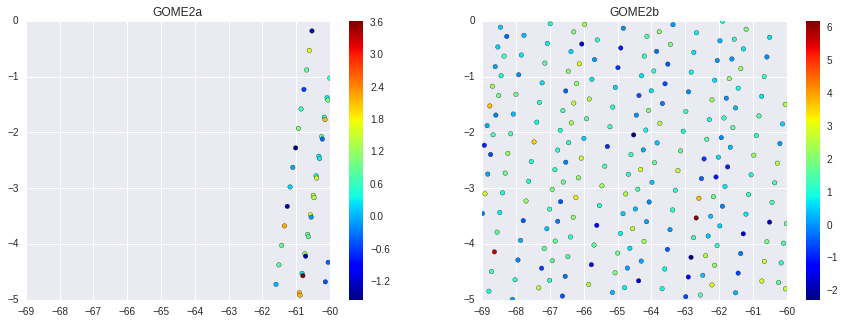

2013 5 6


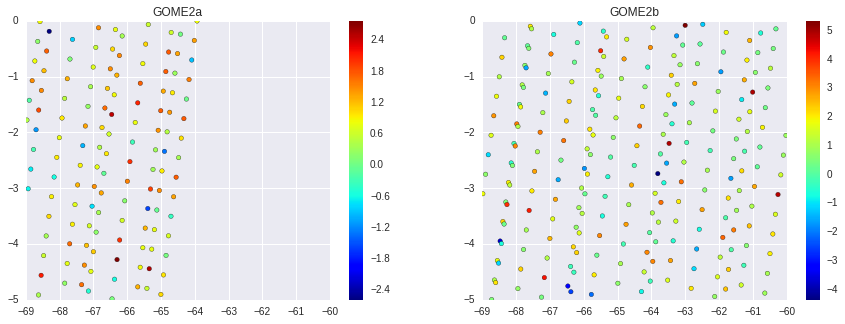

2013 5 7


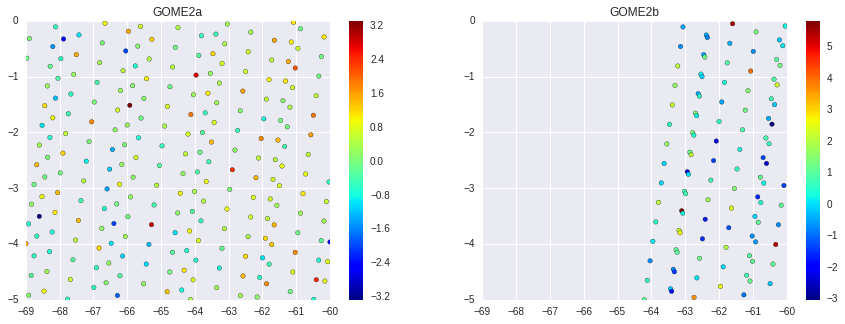

2013 5 8


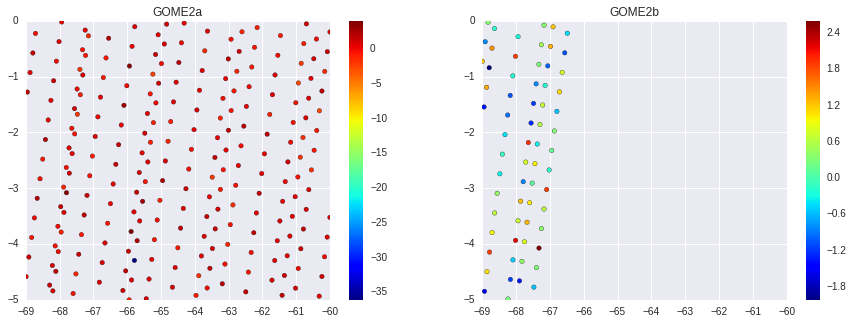

2013 5 9


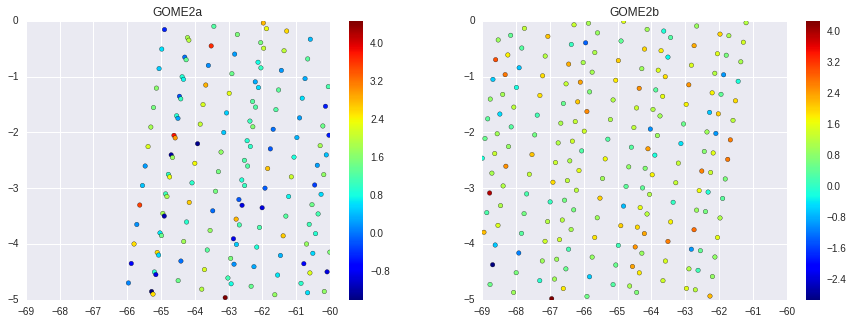

2013 5 11


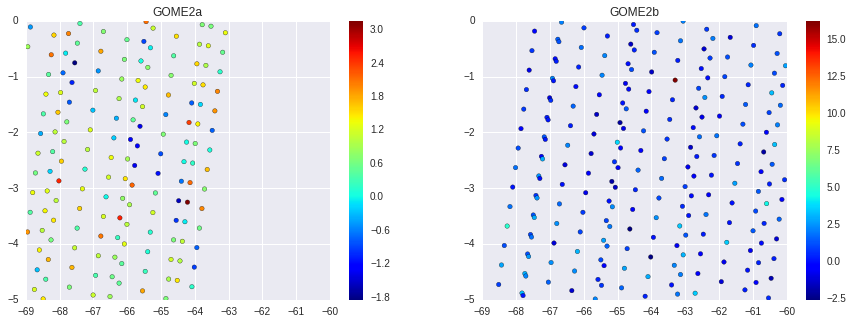

2013 5 12


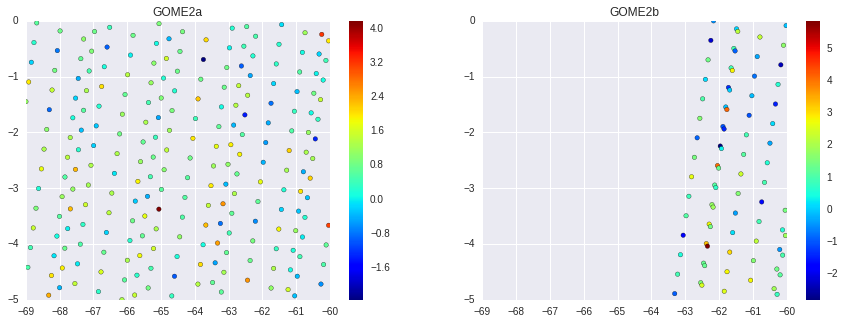

2013 5 13


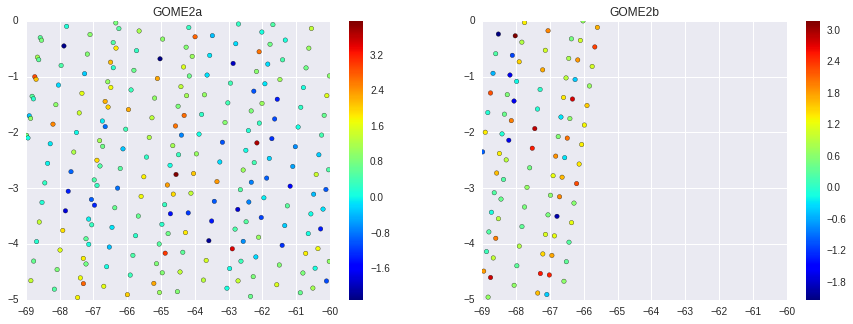

2013 5 14


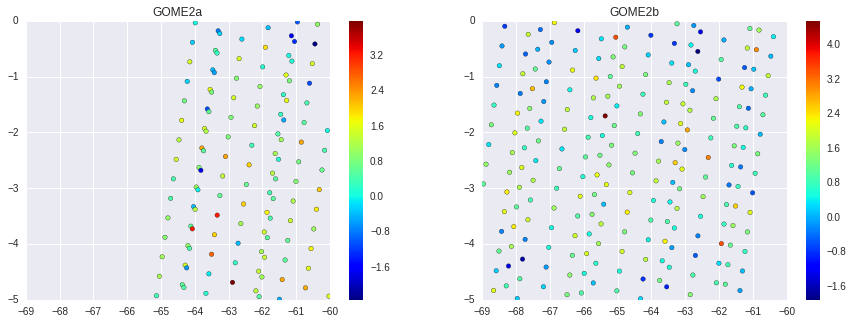

2013 5 15


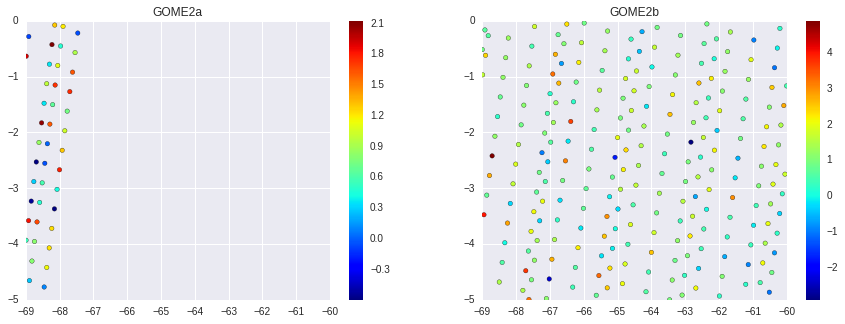

2013 5 16


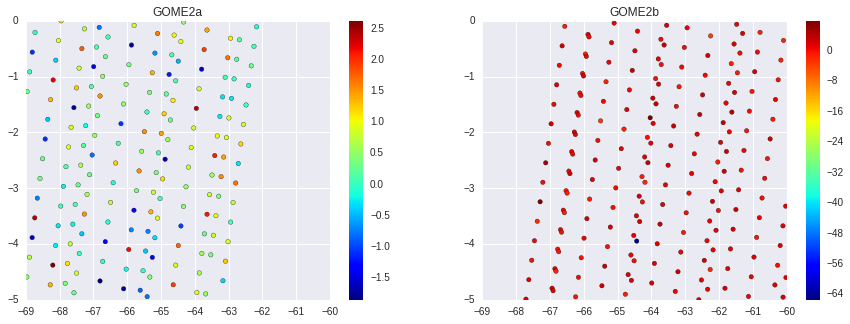

2013 5 17


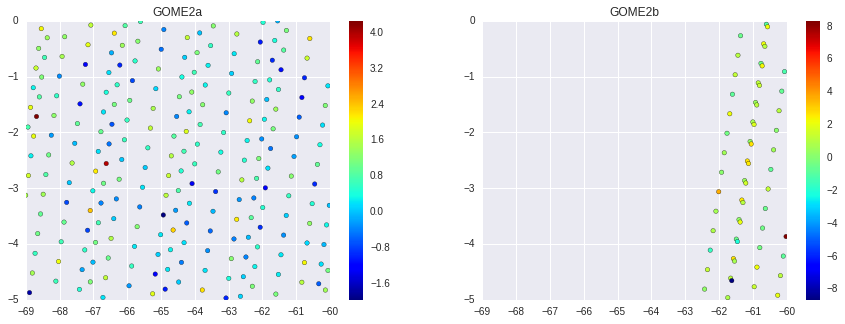

2013 5 18


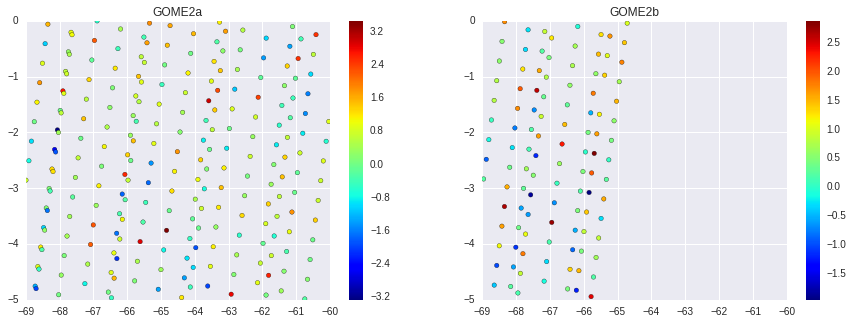

2013 5 19


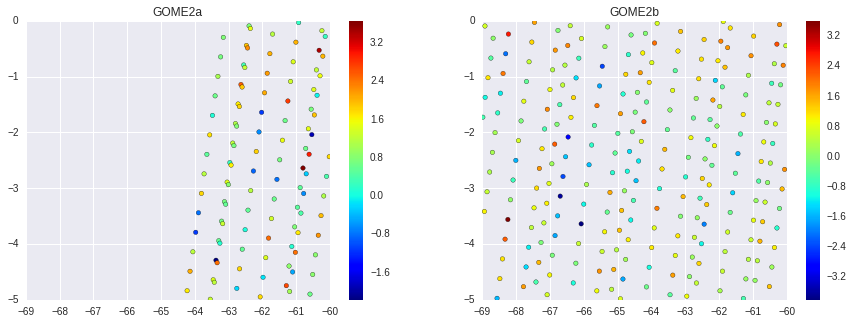

2013 5 20


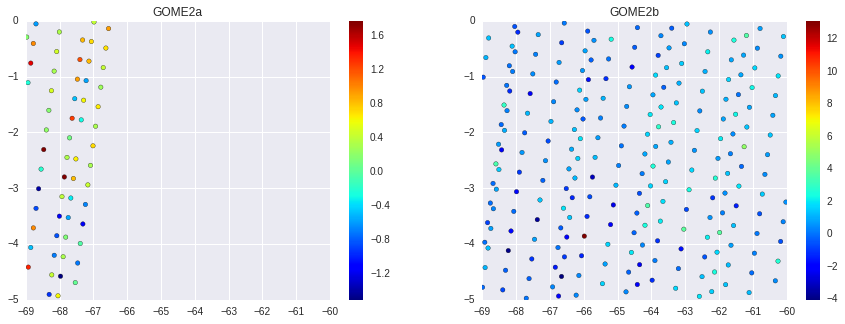

2013 5 21


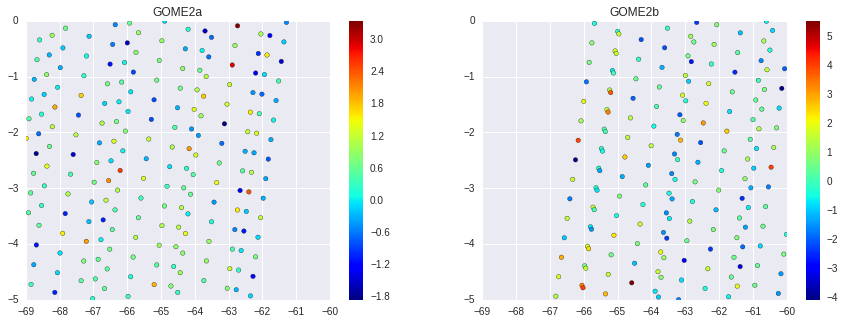

2013 5 22


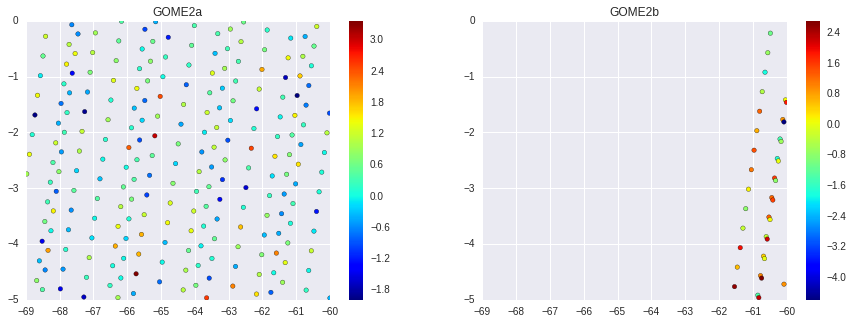

2013 5 23


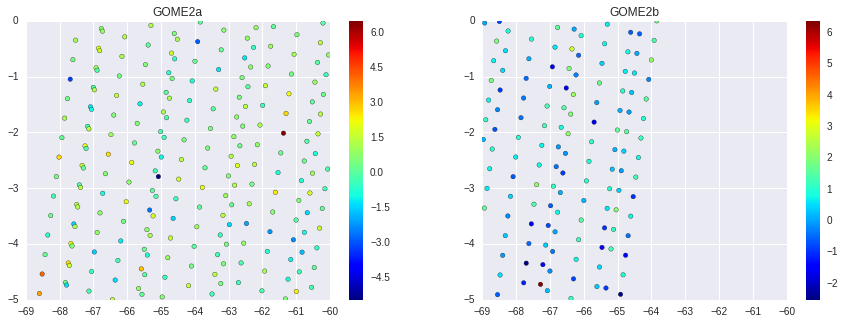

2013 5 24


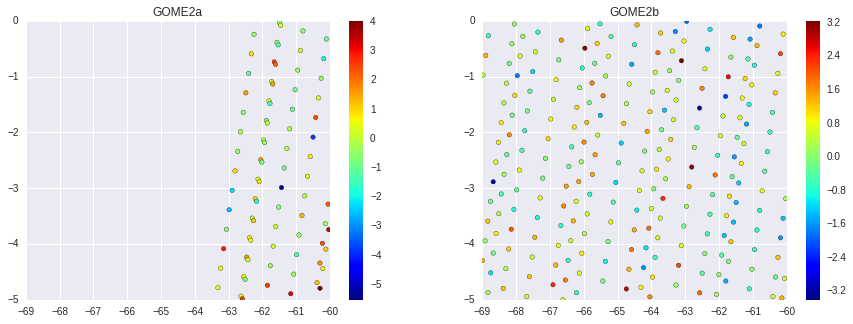

2013 5 25


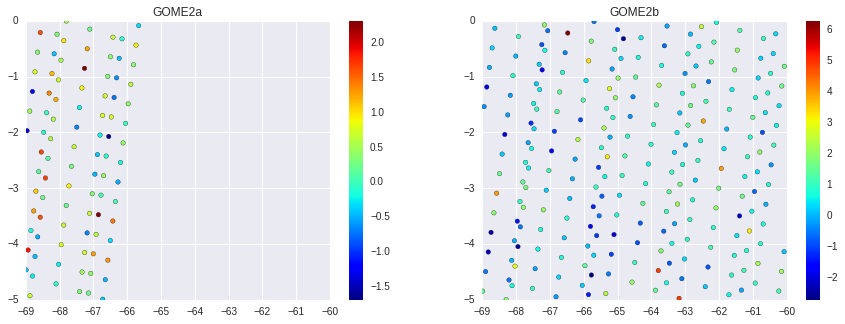

2013 5 26


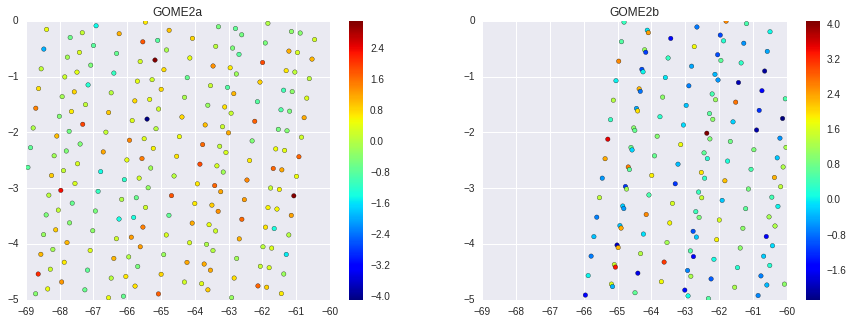

2013 5 27


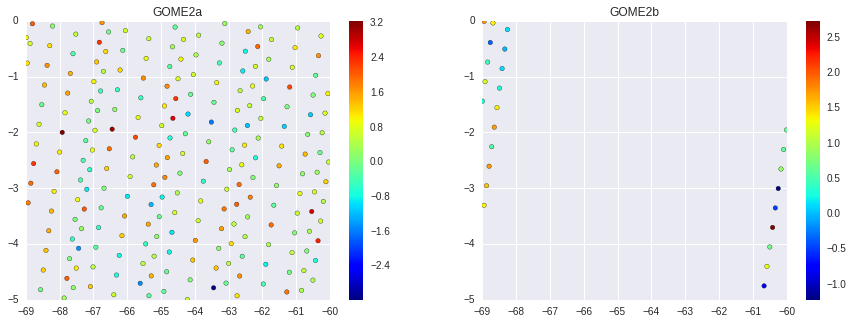

2013 5 28


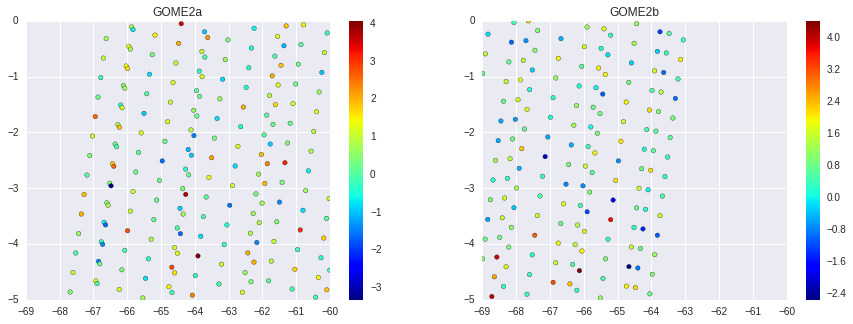

2013 5 29


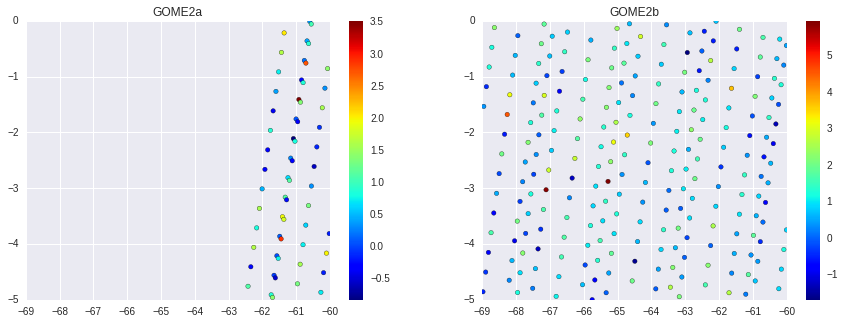

2013 5 30


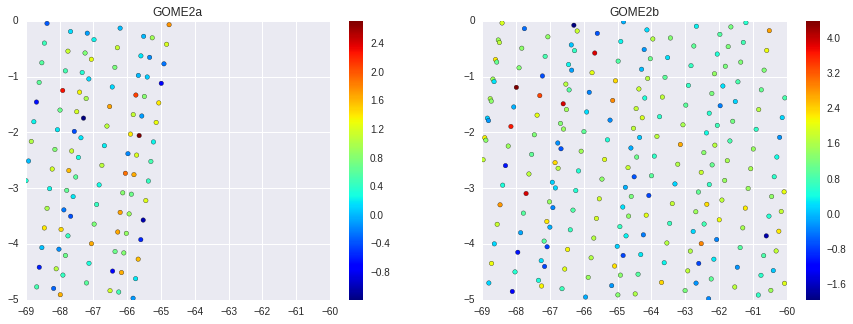

2013 5 31


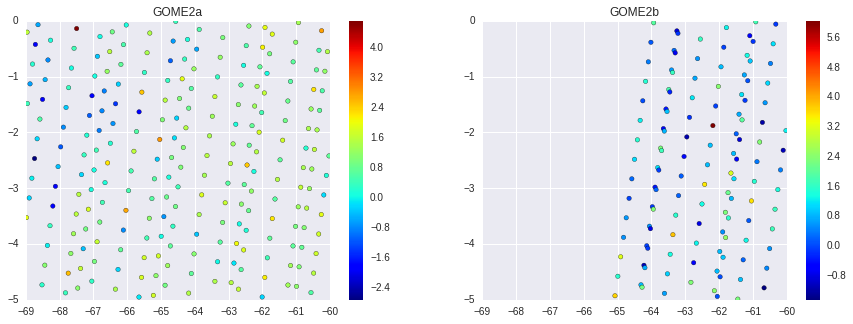

2013 6 1


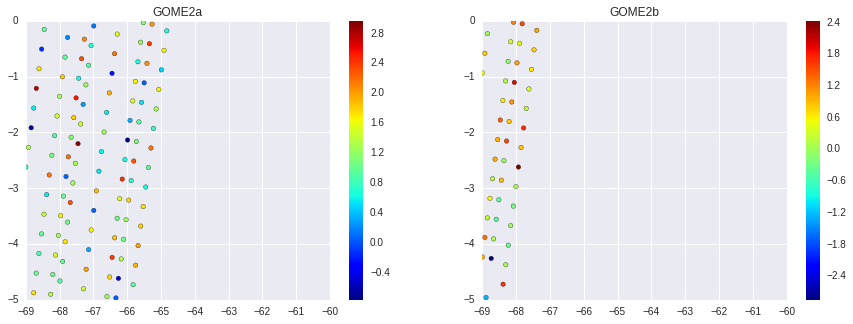

2013 6 2


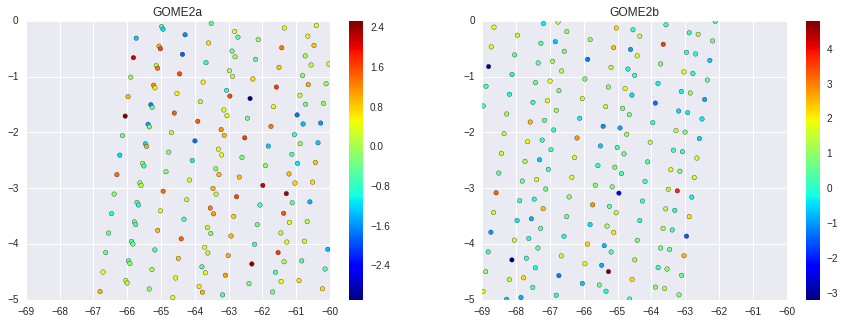

2013 6 3


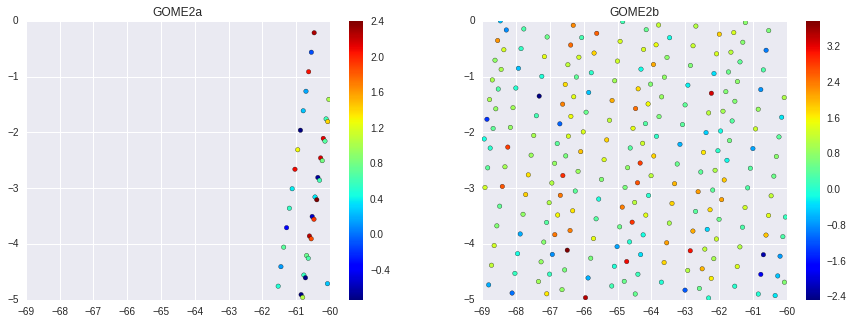

2013 6 4


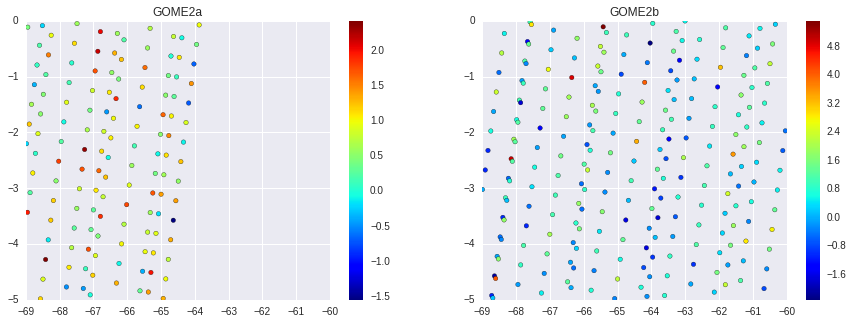

2013 6 5


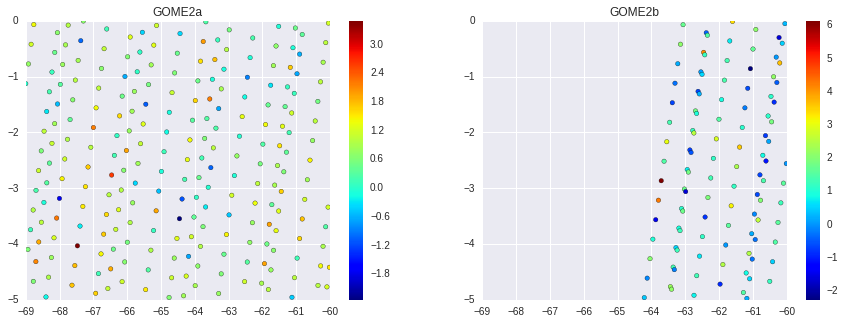

2013 6 6


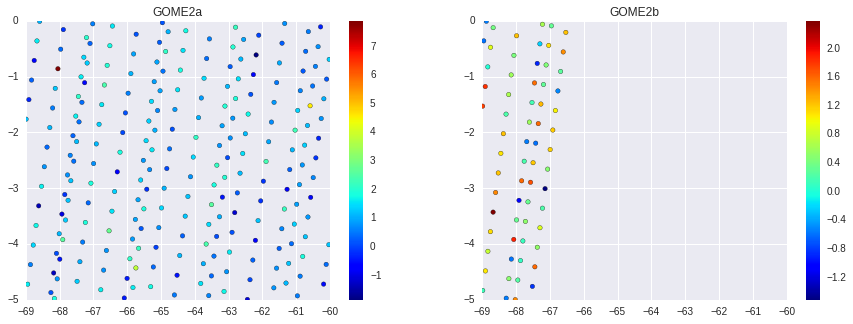

2013 6 7


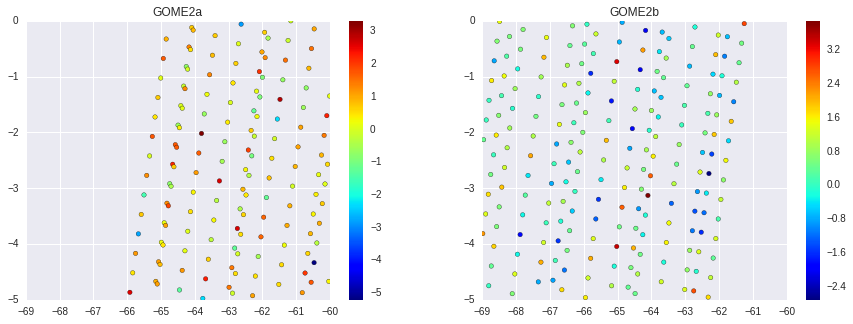

2013 6 9


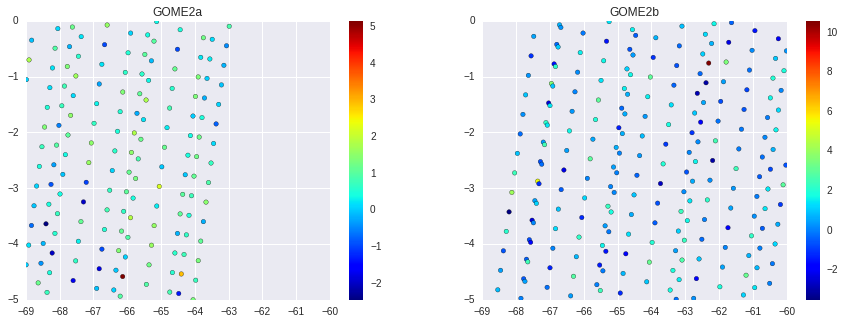

2013 6 11


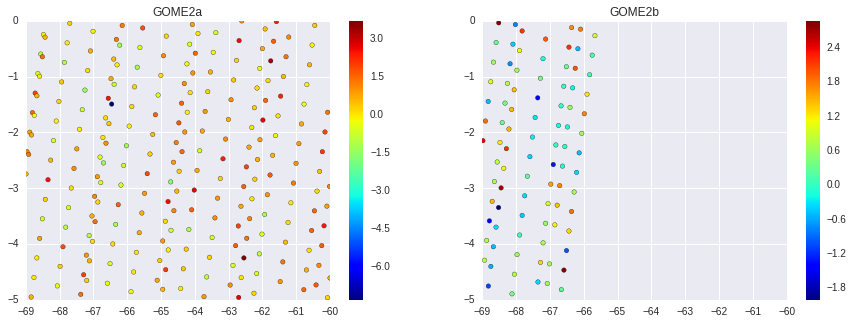

2013 6 12


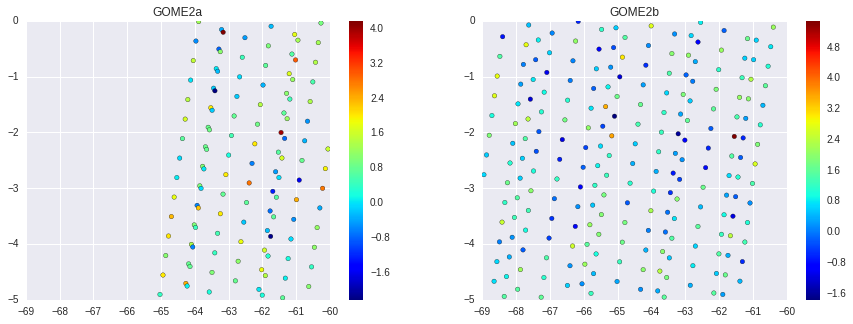

2013 6 13


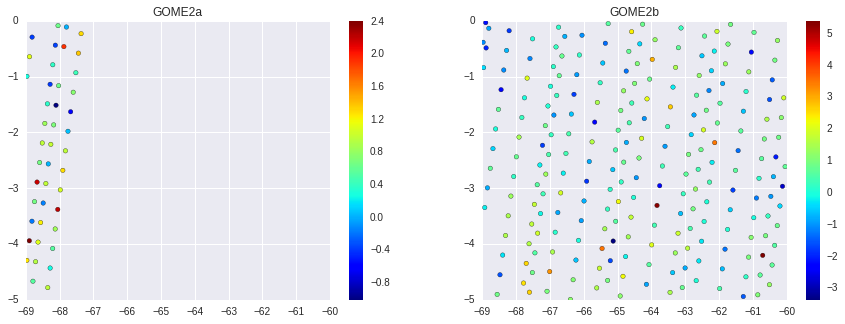

2013 6 14


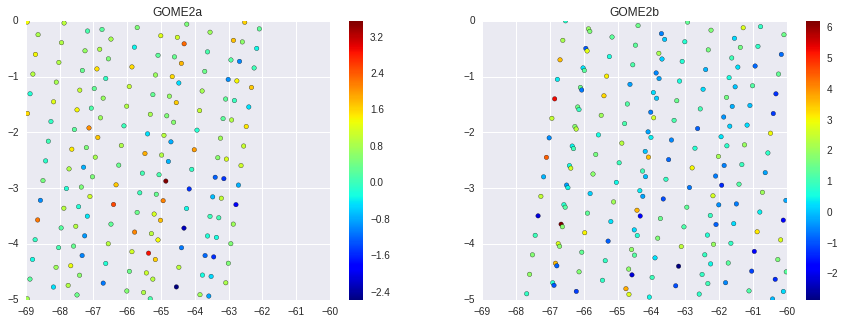

2013 6 15


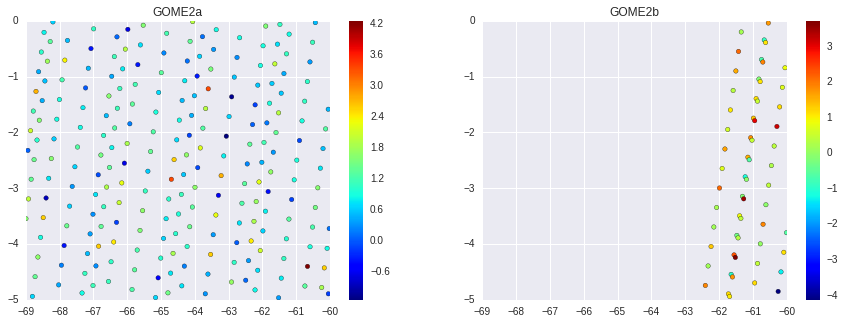

2013 6 16


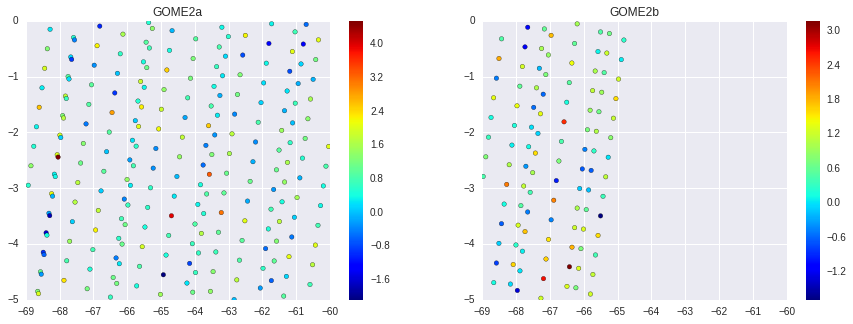

2013 6 17


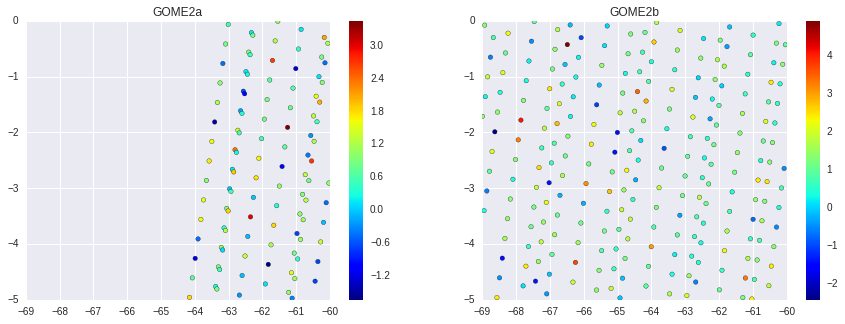

2013 6 18


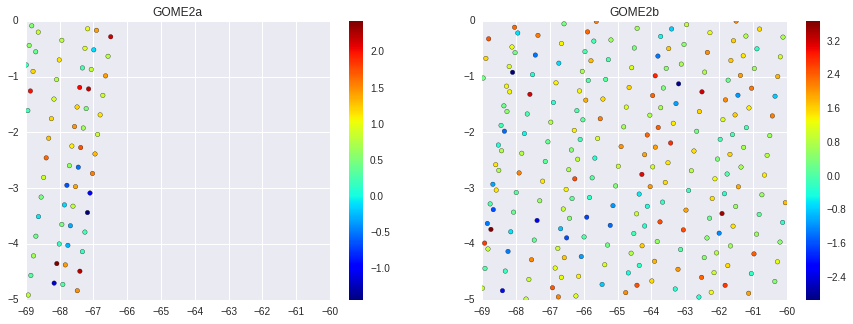

2013 6 20


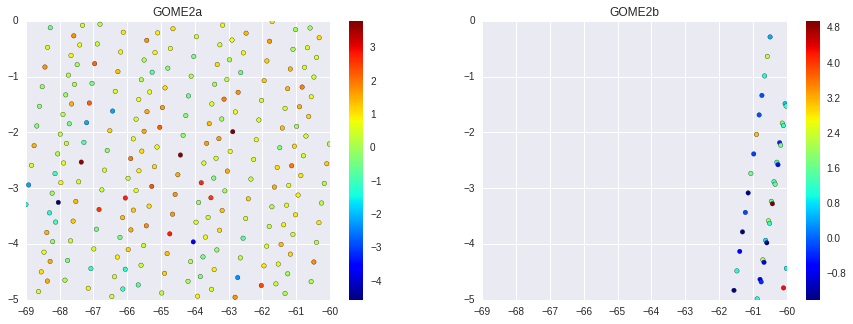

2013 6 21


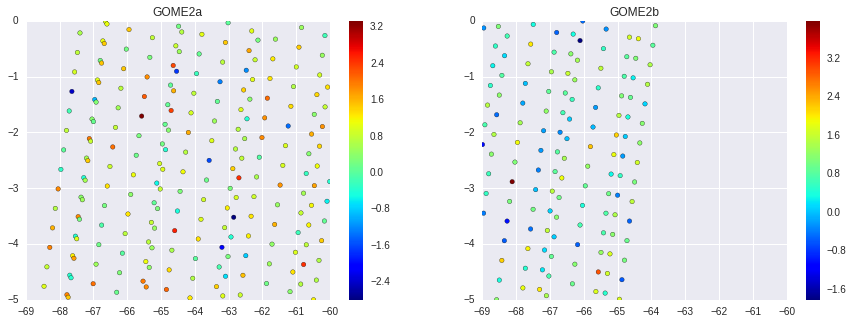

2013 6 22


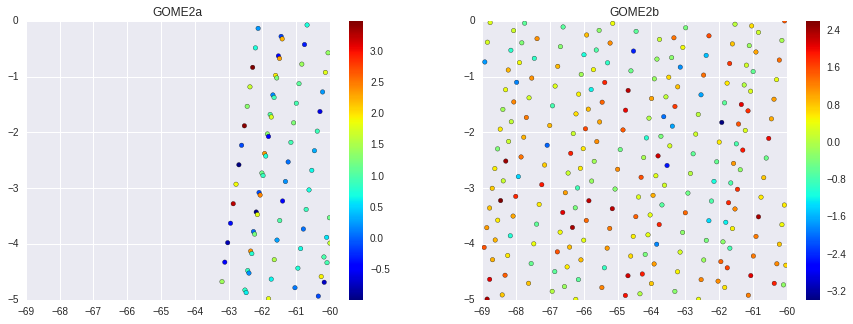

2013 6 23


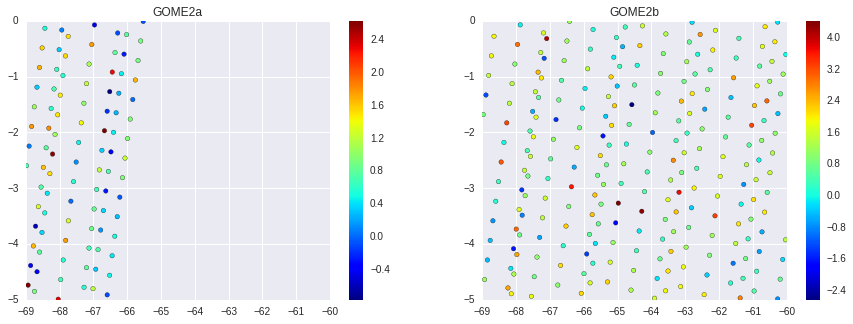

2013 6 24


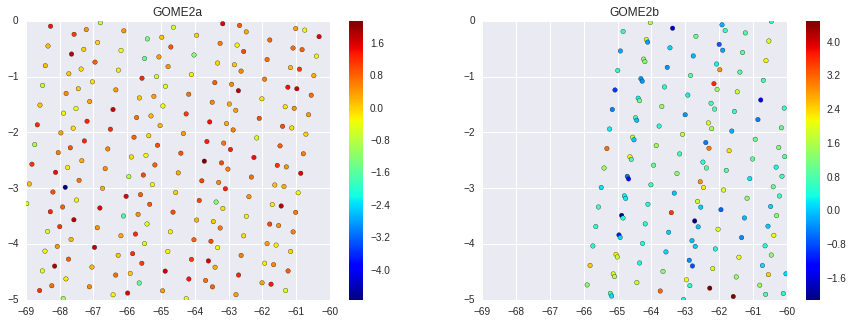

2013 6 25


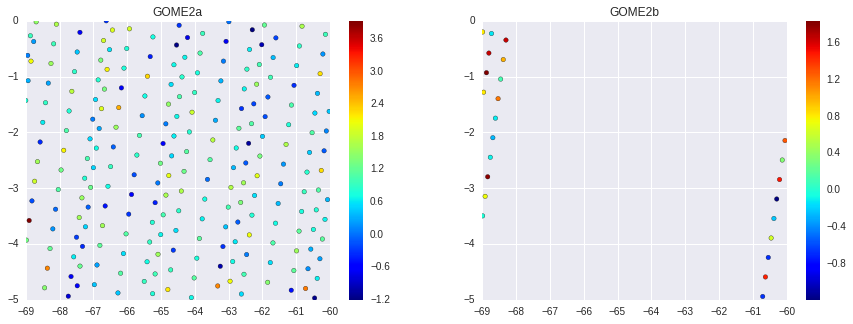

2013 6 26


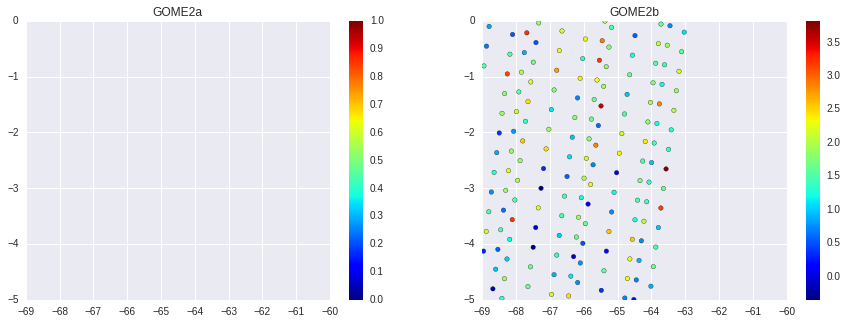

2013 6 27


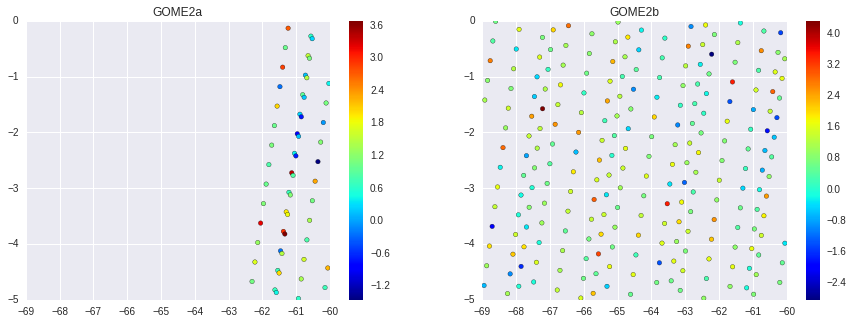

2013 6 28


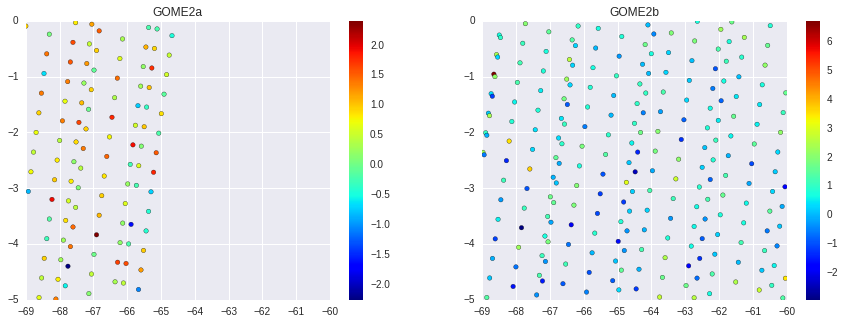

2013 6 29


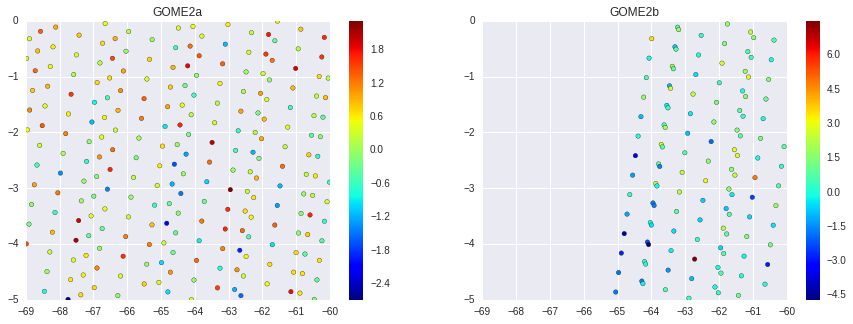

2013 6 30


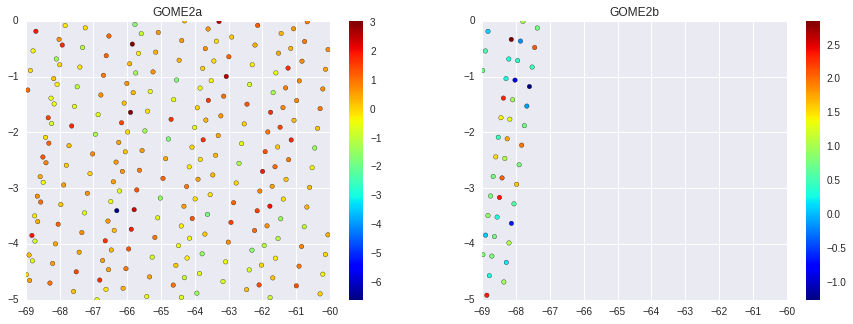

2013 7 1


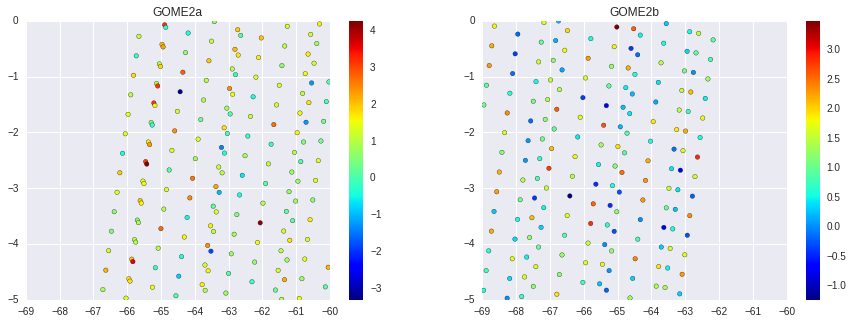

2013 7 2


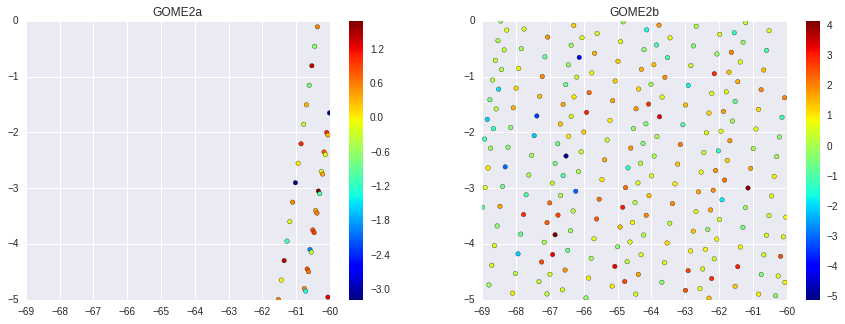

2013 7 3


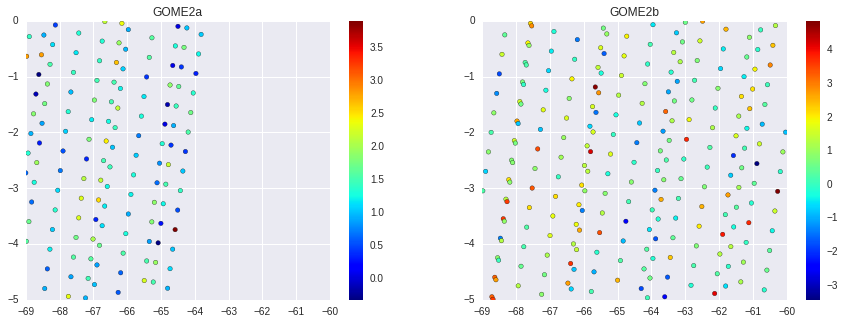

2013 7 4


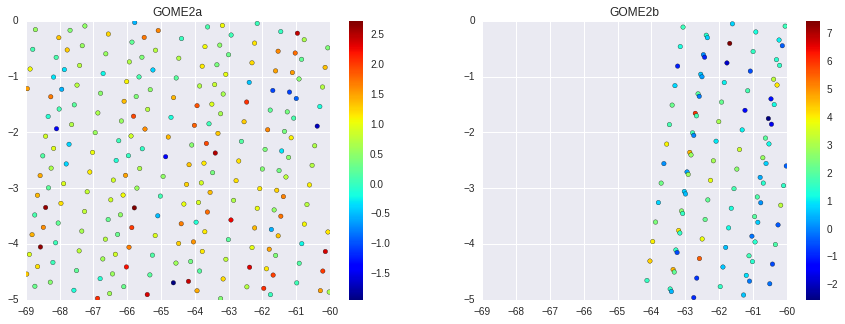

2013 7 5


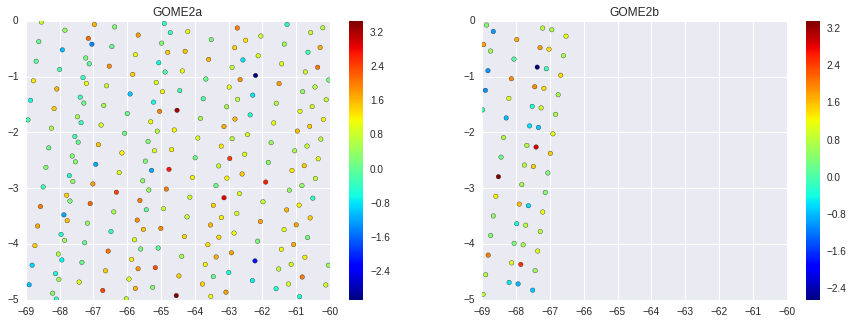

2013 7 6


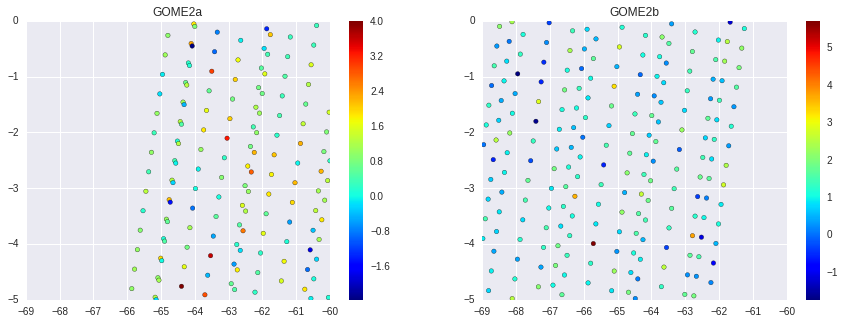

2013 7 8


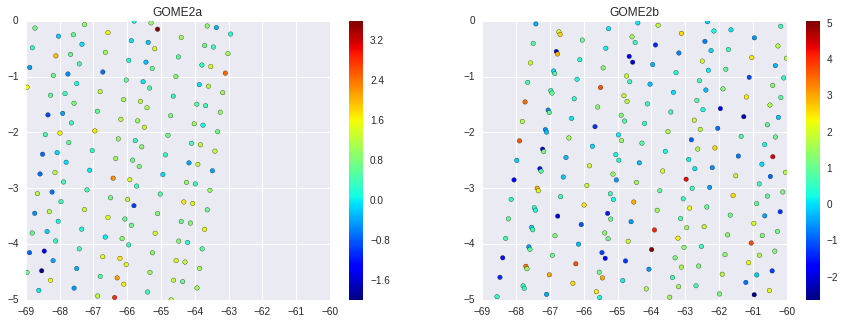

2013 7 9


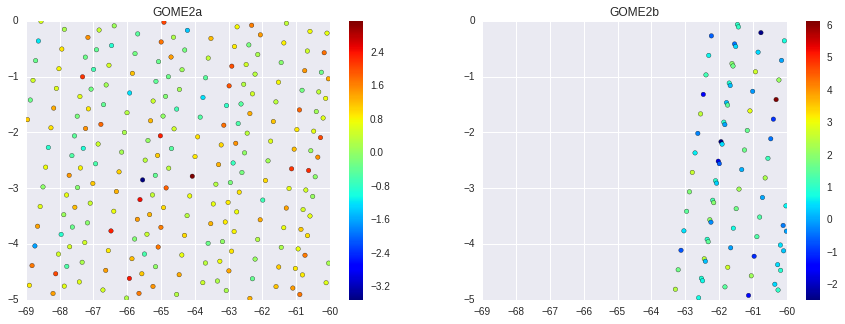

2013 7 10


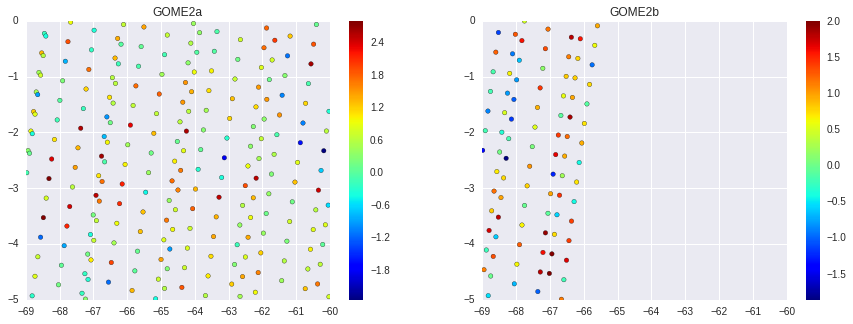

2013 7 11


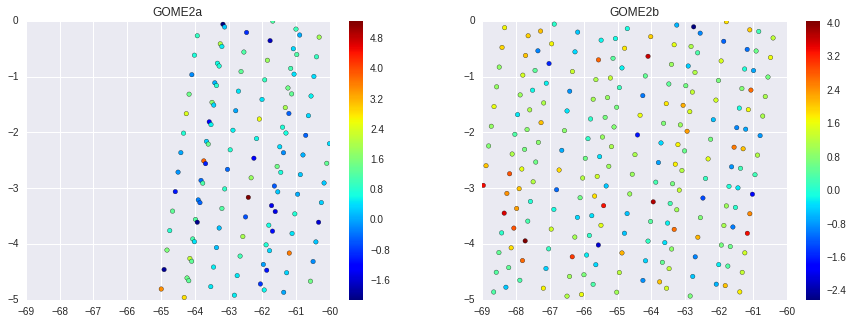

2013 7 12


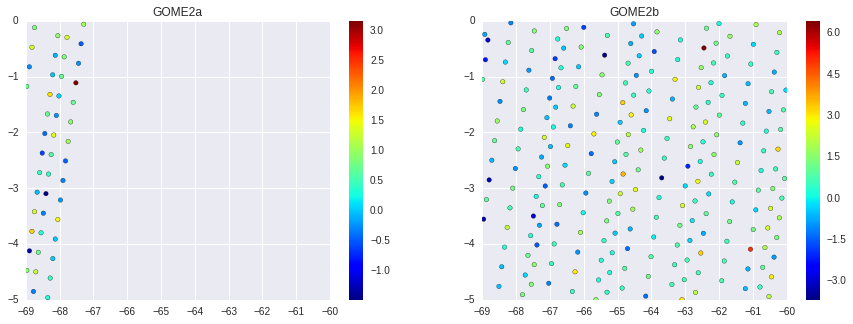

2013 7 13


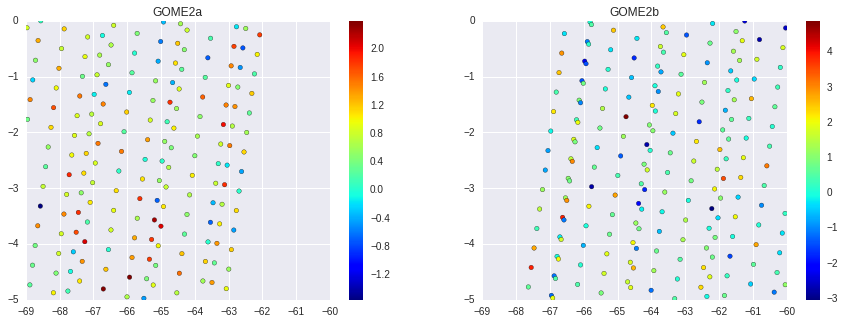

2013 7 14


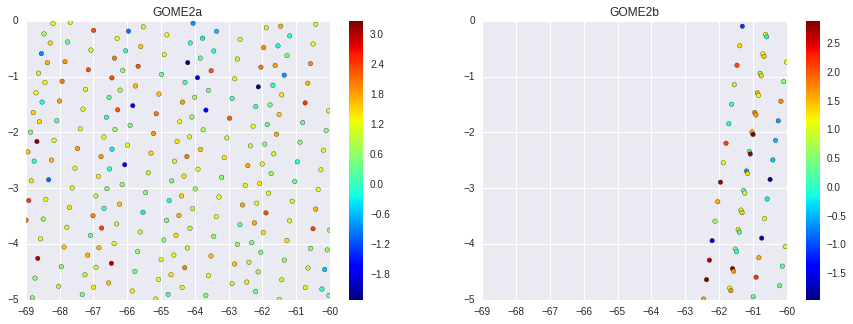

In [51]:
latmin = -5
latmax = 0
lonmin = -69
lonmax = -60

path       = 'dataframes/Joiner/joiner_A_'
path2      = 'dataframes/Joiner/joiner_B_'
start_date = '2013-03-01'
end_date   = '2013-07-14'

daterange  = pd.date_range(start_date, end_date)

for single_date in daterange:
    
    month = single_date.month
    day   = single_date.day
    date  = single_date.strftime("%Y%m%d")

    try:
        filesA = path  + date
        filesB = path2 + date
        df1 = pd.read_pickle(filesA)
        df2 = pd.read_pickle(filesB)
    except:
        continue
        
    df1A = df1.loc[ (df1['lat']>=latmin) & (df1['lat']<=latmax) & (df1['lon']>=lonmin) & (df1['lon']<=lonmax),
                 ['lat','lon','Fs','SZA','VZA']]

    df2A = df2.loc[ (df2['lat']>=latmin) & (df2['lat']<=latmax) & (df2['lon']>=lonmin) & (df2['lon']<=lonmax),
                 ['lat','lon','Fs','SZA','VZA']]
    
    fig = plt.figure(1,figsize(15,5))
    print single_date.year, single_date.month, single_date.day 
    plt.subplot(121)
    plt.title('GOME2a')
    plt.scatter(df1A['lon'],df1A['lat'],c=df1A['Fs'],cmap='jet')
    plt.colorbar()
    plt.xlim(lonmin,lonmax)
    plt.ylim(latmin,latmax)

    plt.subplot(122)
    plt.title('GOME2b')
    plt.scatter(df2A['lon'],df2A['lat'],c=df2A['Fs'],cmap='jet')
    plt.colorbar()
    plt.xlim(lonmin,lonmax)
    plt.ylim(latmin,latmax)

    plt.subplots_adjust(wspace=0.2,hspace=0.3)
    plt.show()


In [54]:
testA['Fs_uncorrected'].values[0]#info()

-0.68783069

In [76]:
Amazon = False
Africa = False
Asia   = True

if Amazon:
    latmin = -5
    latmax = 0
    lonmin = -69
    lonmax = -60

if Africa:
    latmin = -1
    latmax = 4
    lonmin = 18
    lonmax = 27

if Asia:
    latmin = -2.5
    latmax = 1.2
    lonmin = 111
    lonmax = 116

path       = 'dataframes/Joiner/joiner_A_'
path2      = 'dataframes/Joiner/joiner_B_'
start_date = '2013-03-01'
end_date   = '2013-07-14'

daterange  = pd.date_range(start_date, end_date)
matched    = pd.DataFrame(index=range(100),columns=['Year','Month','Day','lat/lon G2A','lat/lon G2B','FsA','FsA_un','Qf_A',
                                                    'FsB','FsB_un','Qf_B','VZA G2A','VZA G2B','CF G2A','CF G2b'])
cont = 0

for single_date in daterange:
    
    year  = single_date.year
    month = single_date.month
    day   = single_date.day
    date  = single_date.strftime("%Y%m%d")
    
    try:
        filesA = path  + date
        filesB = path2 + date
        df1 = pd.read_pickle(filesA)
        df2 = pd.read_pickle(filesB)
    except:
        continue
    
    df1A = df1.loc[ (df1['lat']>=latmin) & (df1['lat']<=latmax) & (df1['lon']>=lonmin) & (df1['lon']<=lonmax) &
                    (df1['Cloud Fraction']<0.4),['lat','lon','Fs','Fs_uncorrected','SZA','VZA','Cloud Fraction','Q_flag']]

    df2A = df2.loc[ (df2['lat']>=latmin) & (df2['lat']<=latmax) & (df2['lon']>=lonmin) & (df2['lon']<=lonmax) &
                    (df2['Cloud Fraction']<0.4),['lat','lon','Fs','Fs_uncorrected','SZA','VZA','Cloud Fraction','Q_flag']]

    df1A['lat/lon'] = list(zip(df1A.lat, df1A.lon))
    df2A['lat/lon'] = list(zip(df2A.lat, df2A.lon))

    threshold  = 0.07

    for ii in range(df1A.shape[0]):
        ref_coord = df1A.loc[df1A.index[ii],'lat/lon']
        for jj in range(df2A.shape[0]):
            ref_coord2 = df2A.loc[df2A.index[jj],'lat/lon']
            check_lat = abs(ref_coord[0] - ref_coord2[0])
            check_lon = abs(ref_coord[1] - ref_coord2[1])
            if check_lat < threshold and check_lon < threshold:
                #print 'meet threshold'
                df3 = df1A.loc[(df1A['lat/lon'] == ref_coord),['Fs','Fs_uncorrected','Q_flag','SZA','VZA','Cloud Fraction','lat/lon']]
                df4 = df2A.loc[(df2A['lat/lon'] == ref_coord2),['Fs','Fs_uncorrected','Q_flag','SZA','VZA','Cloud Fraction','lat/lon']]
                
                matched.loc[cont] = pd.Series({'Year':year,'Month':month,'Day':day,'lat/lon G2A':ref_coord,
                                               'lat/lon G2B':ref_coord2,'FsA':df3['Fs'].values[0],
                                               'FsA_un':df3['Fs_uncorrected'].values[0],'Qf_A':df3['Q_flag'].values[0],
                                               'FsB':df4['Fs'].values[0],'FsB_un':df4['Fs_uncorrected'].values[0],
                                               'Qf_B':df4['Q_flag'].values[0],'VZA G2A':df3['VZA'].values[0],
                                               'VZA G2B':df4['VZA'].values[0],'CF G2A':df3['Cloud Fraction'].values[0],
                                               'CF G2b':df4['Cloud Fraction'].values[0]})
                cont += 1

print 'done'

done


In [72]:
print 'Amazon'
matched.shape

Amazon


(869, 15)

In [63]:
print 'Africa'
matched.shape

Africa


(1031, 15)

In [77]:
print 'Asia'
matched.shape

Asia


(234, 15)

In [78]:
threshold  = 0.2
df_cf      =  pd.DataFrame(index=range(100),columns=['Year','Month','Day','lat/lon G2A','lat/lon G2B','FsA','FsA_un',
                                                     'Qf_A','FsB','FsB_un','Qf_B','VZA G2A','VZA G2B','CF G2A','CF G2b'])
cont = 0
for i in range(0,matched.shape[0]):
    cfa = matched.loc[i,'CF G2A']
    cfb = matched.loc[i,'CF G2b']
    check = abs(cfa - cfb)
    
    if check < threshold: 
    
        df_cf.loc[cont] = pd.Series({'Year':matched.loc[i,'Year'], 'Month':matched.loc[i,'Month'],
                                     'Day':matched.loc[i,'Day'], 'lat/lon G2A':matched.loc[i,'lat/lon G2A'],
                                     'lat/lon G2B':matched.loc[i,'lat/lon G2B'],
                                     'FsA':matched.loc[i,'FsA'],'FsA_un':matched.loc[i,'FsA_un'],
                                     'Qf_A':matched.loc[i,'Qf_A'],'FsB':matched.loc[i,'FsB'],
                                     'FsB_un':matched.loc[i,'FsB_un'],'Qf_B':matched.loc[i,'Qf_B'],
                                     'VZA G2A':matched.loc[i,'VZA G2A'],'VZA G2B':matched.loc[i,'VZA G2B'],
                                     'CF G2A':matched.loc[i,'CF G2A'],'CF G2b':matched.loc[i,'CF G2b']
                                    })
        cont += 1
        
print 'done',df_cf.shape

done (215, 15)


(215, 15)
(27,)
1.11372220516 1.24232411385
(188, 15)


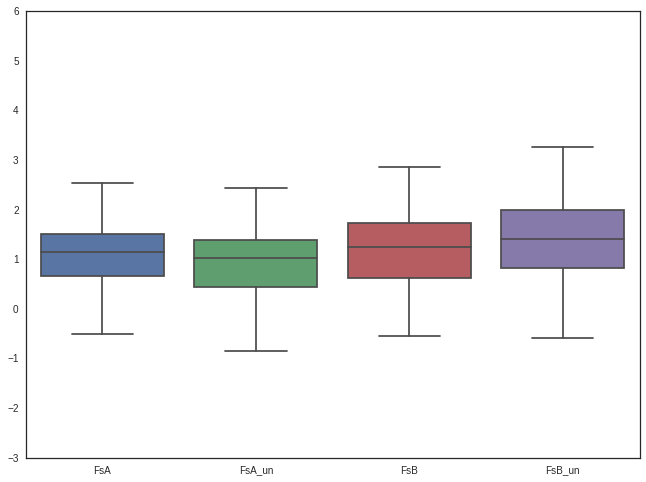

In [79]:
matched = df_cf
sns.set_style('white')
StdA    = matched['FsA'].std()
StdB    = matched['FsB'].std()
meanA   = matched['FsA'].mean()
meanB   = matched['FsB'].mean()
minA    = matched['FsA'].min()
minB    = matched['FsB'].min()
maxA    = matched['FsA'].max()
maxB    = matched['FsB'].max()
medianA = matched['FsA'].median()
medianB = matched['FsB'].median()
print matched.shape

cols    = [str(i) for i in matched.columns]
i_list  = matched.loc[(matched['FsA']>(meanA+2*StdA)),cols].index.values
i_list  = np.append((matched.loc[(matched['FsA']<(meanA-2*StdA)),cols].index.values),i_list)
i_list  = np.append((matched.loc[(matched['FsB']>(meanB+2*StdB)),cols].index.values),i_list)
i_list  = np.append((matched.loc[(matched['FsB']<(meanB-2*StdB)),cols].index.values),i_list)
i_list  = np.sort(i_list)

print i_list.shape

new_match = matched.drop(matched.index[i_list])
sns.set_style('white')
sns.boxplot((new_match[['FsA','FsA_un','FsB','FsB_un']]))
plt.ylim(-3,6)
print medianA, medianB
print new_match.shape
plt.show()

In [80]:
new_match.to_pickle('Asia_Joiner')

In [81]:
asia   = pd.read_pickle('Asia_Joiner')
amazon = pd.read_pickle('Amazon_Joiner')
africa = pd.read_pickle('Africa_Joiner')

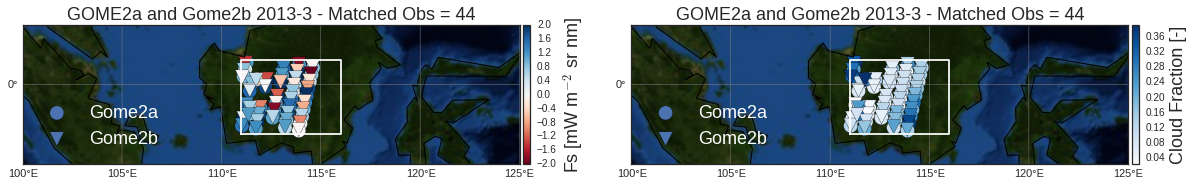

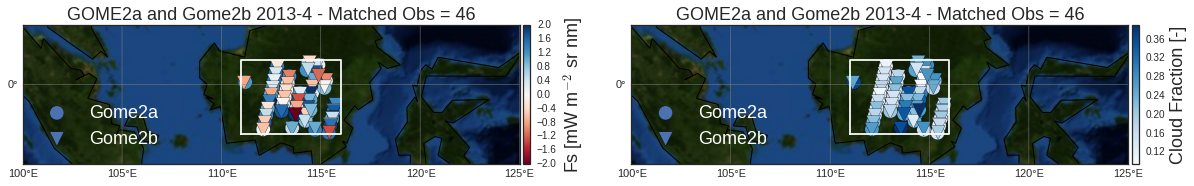

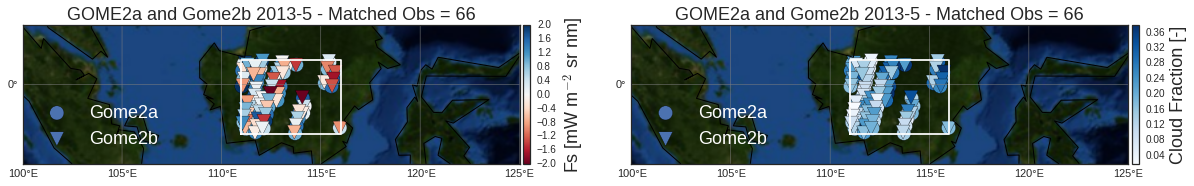

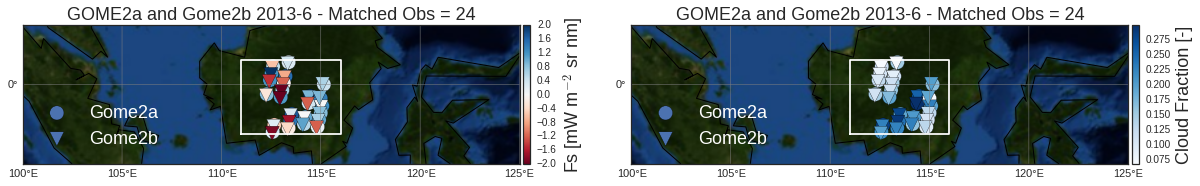

In [93]:
Amazon = False
Africa = False
Asia   = True

if Amazon:
    latmin   = -7
    latmax   = 2
    lonmin   = -70
    lonmax   = -57
    new_match= amazon
    
if Africa:
    latmin   = -4
    latmax   = 8
    lonmin   = 15
    lonmax   = 32
    new_match= africa

if Asia:
    latmin = -4
    latmax = 3
    lonmin = 100
    lonmax = 125
    new_match= asia
    
start_date = '2013-03-01'
end_date   = '2013-07-14'
daterange  = pd.date_range(start_date, end_date,freq='M')

for single_date in daterange:
    
    year  = single_date.year
    month = single_date.month
    
    if year == 2013 and month == 12: continue

    lonsA     = list(new_match['lat/lon G2A'].loc[new_match['Month']==month])
    latsA     = list(new_match['lat/lon G2A'].loc[new_match['Month']==month])
    fsA       = new_match['FsA'].loc[new_match['Month']==month]
    cfA       = new_match['CF G2A'].loc[new_match['Month']==month]
    lon_listA = []
    lat_listA = []

    for i in range(len(lonsA)):
        lon_listA.append(lonsA[i][1])
        lat_listA.append(latsA[i][0])

    lonsB     = list(new_match['lat/lon G2B'].loc[new_match['Month']==month])
    latsB     = list(new_match['lat/lon G2B'].loc[new_match['Month']==month])
    fsB       = new_match['FsB'].loc[new_match['Month']==month]
    cfB       = new_match['CF G2b'].loc[new_match['Month']==month]
    lon_listB = []
    lat_listB = []

    for j in range(len(lonsB)):
        lon_listB.append(lonsB[j][1])
        lat_listB.append(latsB[j][0])   
        
    fig   = plt.figure(1,figsize=(20,20))
    map   = Basemap(projection='cyl',llcrnrlat=latmin, urcrnrlat=latmax, llcrnrlon=lonmin, urcrnrlon=lonmax)

    xx,yy = map(lon_listA, lat_listA)
    x,y   = map(lon_listB, lat_listB)
    
    plt.subplot(121)
    sc    = plt.scatter(xx,yy,c=fsA,cmap='RdBu',marker='o',s=200,label='Gome2a')
    scc   = plt.scatter(x,y,c=fsB,cmap='RdBu',marker='v',s=200,label='Gome2b')
    sc.set_clim(vmin=-2, vmax=2)
    cb    = add_colorbar(sc)
    plt.title('GOME2a and Gome2b %i-%i - Matched Obs = %i'%(year,month,len(lon_listA)),fontsize=18)
    cb.set_label('Fs [mW m$^{-2}$ sr nm]',fontsize=18)
    leg = plt.legend(loc='lower left',fontsize=18)
    for text in leg.get_texts():
        plt.setp(text, color = 'w')
    map.drawcoastlines()
    map.drawparallels(np.arange(-40,10,5),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[1,0,0,0],fontsize=11)
    map.drawmeridians(np.arange(-180,180,5),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[0,0,0,1],fontsize=11)
    #map.drawcountries()
    map.bluemarble()
    #plot_rectangle(map,-69,-60,-5,0) #Amazon
    #plot_rectangle(map,18,27,-1,4) # Africa
    plot_rectangle(map,111,116,-2.5,1.2)
    
    plt.subplot(122)
    sc    = plt.scatter(xx,yy,c=cfA,cmap='Blues',marker='o',s=200,label='Gome2a')
    scc   = plt.scatter(x,y,c=cfB,cmap='Blues',marker='v',s=200,label='Gome2b')
    cb    = add_colorbar(scc)
    plt.title('GOME2a and Gome2b %i-%i - Matched Obs = %i'%(year,month,len(lon_listA)),fontsize=18)
    cb.set_label('Cloud Fraction [-]',fontsize=18)
    leg = plt.legend(loc='lower left',fontsize=18)
    for text in leg.get_texts():
        plt.setp(text, color = 'w')
    map.drawcoastlines()
    map.drawparallels(np.arange(-40,10,5),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[1,0,0,0],fontsize=11)
    map.drawmeridians(np.arange(-180,180,5),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[0,0,0,1],fontsize=11)
    #map.drawcountries()
    map.bluemarble()
    
    #plot_rectangle(map,-69,-60,-5,0)
    #plot_rectangle(map,18,27,-1,4)
    plot_rectangle(map,111,116,-2.5,1.2)
    plt.show()
    